In [1]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import timedelta
from scipy.stats import pearsonr, spearmanr
import cartopy.crs as ccrs
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
from ipynb.fs.defs.Chrisdata_analysis import buckdata, projection, monthly
csv = [pd.read_csv(f) for f in glob.glob("/data/dhence/a/pborse2/inputdata/ISWS_data/Champaign/*.csv")]
from ipynb.fs.defs.ISWSdataset_Champaign import aprnov
csvlist = [aprnov(csv)[i] for i in range(len(csv))]
os.chdir('/data/dhence/a/pborse2/inputdata/data.eol.ucar.edu/pub/download/extra/katz_data/stage4/daily_data')
fi = [f for f in glob.glob('*.nc')]
fi.sort()

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  },
/data/keeling/a/pborse2/Deanna Research/Research/Actual analysis/ISWSdataset_Champaign.ipynb:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [3]:
temp = pd.concat(csvlist)

In [4]:
rain = projection(fi)['tp'].sel(x=slice(734.5,737.5),y=slice(488,490.5)).mean(('x','y'))

In [5]:
missing = "2006-09-04T12:00:00.000000000"
miss1 = "2003-08-26T12:00:00.000000000"
# create an "empty" time slice with fillvalues
empty = xr.full_like(rain.isel(time=0), 0)
emp1 = xr.full_like(rain.isel(time=0), 0)
# fix the time coordinate of the timeslice
empty['time'] =pd.date_range(missing, periods=1)[0]
emp1['time']=pd.date_range(miss1, periods=1)[0]
# concat and sort time
rain = xr.concat([rain, empty,emp1], "time").sortby("time")

/tmp/ipykernel_116174/3076754991.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  notpeaks = lar03[0][set(range(len(lar03)))-set(peaks)]
/tmp/ipykernel_116174/3076754991.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  notpeaks = lar03[0][set(range(len(lar03)))-set(peaks)]
/tmp/ipykernel_116174/3076754991.py:11: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  notpeaks = lar03[0][set(range(len(lar03)))-set(peaks)]


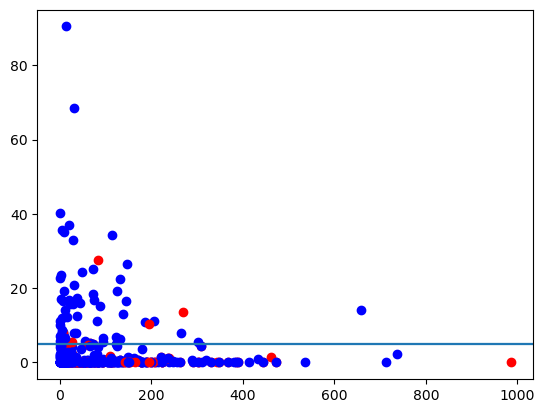

In [6]:
dflar=[]
peaklarv=[]
from scipy.signal import find_peaks
for i in range(2003,2006):
    lar03 = pd.DataFrame(buckdata(i).sum(axis=1))
    peaks, _ = find_peaks(lar03[lar03.index.month.isin(range(6,10))][0], height=0)
#     peaks = np.percentile(lar03[lar03.index.month.isin(range(6,10))][0],85)
#     peaks1=lar03[(lar03.index.month.isin(range(6,10)))&(lar03[0]>=peaks)][0]
#     notpeaks = lar03[(lar03.index.month.isin(range(6,10)))&(lar03[0]<peaks)][0]
    peaks1=lar03[lar03.index.month.isin(range(6,10))][0][peaks]
    notpeaks = lar03[0][set(range(len(lar03)))-set(peaks)]
    r03 = rain.groupby('time.year')[i]
    plt.scatter(peaks1,r03[r03.time.dt.date.isin((peaks1.index-timedelta(1)).date)],color='red')
    plt.scatter(notpeaks,r03[r03.time.dt.date.isin((notpeaks.index-timedelta(1)).date)],color='blue')
    plt.axhline(5)
    # plt.scatter(lar03,r03[r03.time.dt.date.isin((lar03.index-timedelta(1)).date)])
    for k in range(8):
        lar03['rain'+str(k)] = r03[r03.time.dt.date.isin((lar03.index-timedelta(k)).date)].values
    for j in range(8):
        lar03['temp'+str(j)] = (temp[temp.index.isin(lar03.index-timedelta(j))]['MAX AIR TEMP oF'].values-32)*5/9
    dflar.append(lar03)
    peaklarv.append(peaks1)

In [7]:
dflar1 =pd.concat(dflar)
peaklarv1 = pd.concat(peaklarv)

In [8]:
dflar1['meantemp'] = dflar1[dflar1.columns[9:]].mean(axis=1)
dflar1['accumrain'] = dflar1[dflar1.columns[1:9]].sum(axis=1)
for i in range(2,8):
    dflar1['maxrain'+str(i)]=dflar1[dflar1.columns[1:i+1]].max(axis=1)
    dflar1['maxtemp'+str(i)]=dflar1[dflar1.columns[10:10+i]].max(axis=1)
    dflar1['accumrain'+str(i)]=dflar1[dflar1.columns[1:i+1]].sum(axis=1)

In [9]:
dflar1

0     rain0     rain1     rain2     rain3     rain4     rain5  \
DATE                                                                           
2003-05-20   3.0  0.000000  7.477777  0.000000  0.000000  0.000000  1.166667   
2003-05-21   5.0  0.000000  0.000000  7.477777  0.000000  0.000000  0.000000   
2003-05-22   6.0  0.000000  0.000000  0.000000  7.477777  0.000000  0.000000   
2003-05-23  11.0  0.066667  0.000000  0.000000  0.000000  7.477777  0.000000   
2003-05-24  19.0  0.000000  0.066667  0.000000  0.000000  0.000000  7.477777   
...          ...       ...       ...       ...       ...       ...       ...   
2005-10-05  10.0  0.000000  0.000000  0.000000  2.733333  0.000000  0.000000   
2005-10-06   4.0  0.000000  0.000000  0.000000  0.000000  2.733333  0.000000   
2005-10-07   4.0  0.000000  0.000000  0.000000  0.000000  0.000000  2.733333   
2005-10-08   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2005-10-09   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               rain6     rain7  temp0  ...  accumrain4  maxrain5  maxtemp5  \
DATE                                   ...                                   
2003-05-20  5.411111  0.088889   88.9  ...    7.477777  7.477777      87.6   
2003-05-21  1.166667  5.411111   89.9  ...    7.477777  7.477777      88.9   
2003-05-22  0.000000  1.166667   87.1  ...    7.477777  7.477777      89.9   
2003-05-23  0.000000  0.000000   81.8  ...    0.066667  7.477777      89.9   
2003-05-24  0.000000  0.000000   88.4  ...    0.066667  0.066667      89.9   
...              ...       ...    ...  ...         ...       ...       ...   
2005-10-05  0.000000  7.033333   51.2  ...    2.733333  2.733333      77.0   
2005-10-06  0.000000  0.000000   46.4  ...    0.000000  2.733333      77.0   
2005-10-07  0.000000  0.000000   44.6  ...    0.000000  0.000000      77.0   
2005-10-08  2.733333  0.000000   40.5  ...    0.000000  0.000000      77.0   
2005-10-09  0.000000  2.733333   42.1  ...    0.000000  0.000000      76.1   

            accumrain5  maxrain6  maxtemp6  accumrain6  maxrain7  maxtemp7  \
DATE                                                                         
2003-05-20    7.477777  7.477777      87.6    8.644444  7.477777      87.6   
2003-05-21    7.477777  7.477777      88.9    7.477777  7.477777      88.9   
2003-05-22    7.477777  7.477777      89.9    7.477777  7.477777      89.9   
2003-05-23    7.544444  7.477777      89.9    7.544444  7.477777      89.9   
2003-05-24    0.066667  7.477777      89.9    7.544444  7.477777      89.9   
...                ...       ...       ...         ...       ...       ...   
2005-10-05    2.733333  2.733333      77.0    2.733333  2.733333      77.0   
2005-10-06    2.733333  2.733333      77.0    2.733333  2.733333      77.0   
2005-10-07    0.000000  2.733333      77.0    2.733333  2.733333      77.0   
2005-10-08    0.000000  0.000000      77.0    0.000000  2.733333      77.0   
2005-10-09    0.000000  0.000000      77.0    0.000000  0.000000      77.0   

            accumrain7  
DATE                    
2003-05-20   14.055555  
2003-05-21    8.644444  
2003-05-22    7.477777  
2003-05-23    7.544444  
2003-05-24    7.544444  
...                ...  
2005-10-05    2.733333  
2005-10-06    2.733333  
2005-10-07    2.733333  
2005-10-08    2.733333  
2005-10-09    0.000000  

[463 rows x 37 columns]

In [9]:
dflar1=dflar1[dflar1.index.month.isin(range(6,10))]
dflar1['bool']='false'
for i in range(len(dflar1)):
    if(list(peaklarv1.index.values).count(dflar1.index[i])>0):
        dflar1['bool'][i]='true'
##True  means larvae lows and false is larvae non-lows

/tmp/ipykernel_116174/3576082074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dflar1['bool'][i]='true'


In [10]:
def probdist(climvar):
    for i in range(2003,2006):
        dflar1[(dflar1['bool']=='false')&(dflar1.index.year==i)][climvar].hist()
    #     plt.ylim(0,30)
    #     plt.xlim(40,100)
        dflar1[(dflar1['bool']=='true')&(dflar1.index.year==i)][climvar].hist()
    #     plt.ylim(0,30)
    #     plt.xlim(40,100)
        plt.xlabel(climvar)
        plt.ylabel('Frequency of peaks and non-peaks')
        plt.title(str(i))
        plt.legend(['non-peaks','peaks'])
        plt.show()
    dflar1[(dflar1['bool']=='false')][climvar].hist()
    dflar1[(dflar1['bool']=='true')][climvar].hist()
    plt.xlabel('Temperature (deg C) with 1 day lag')
    plt.ylabel('Frequency of peaks and non-peaks')
    plt.legend(['non-peaks','peaks'])
    plt.title('Distribution of temperature associated with larvae abundance \n over three years')
    plt.show()
    dflar1[climvar].hist()
    plt.xlabel('Temperature (deg C) with 1 day lag')
    plt.ylabel('Frequency')
    plt.title('Distribution of temperature over three years')

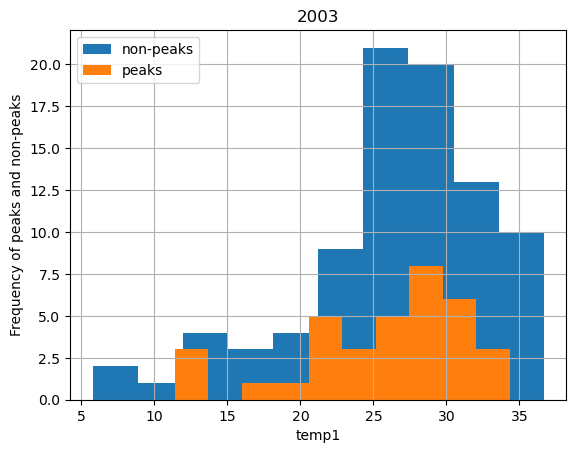

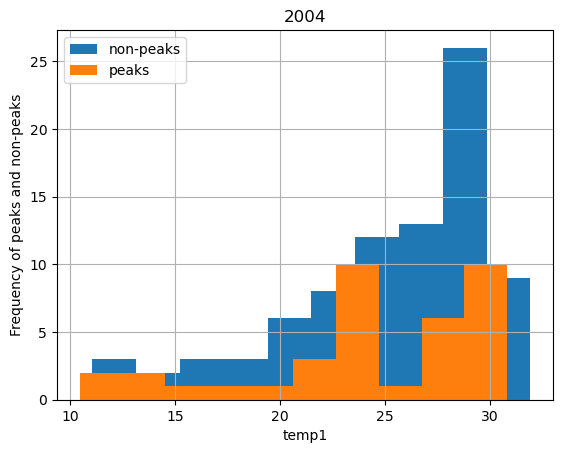

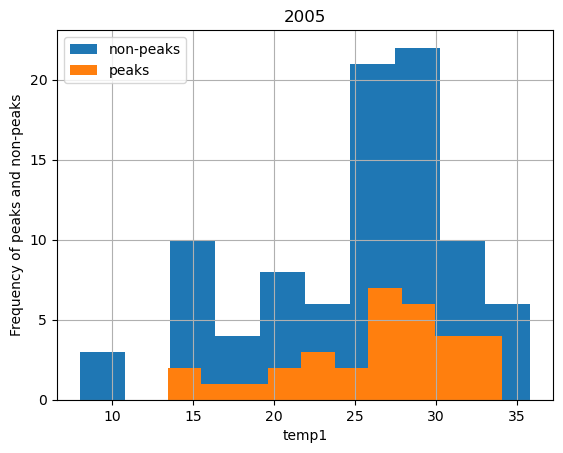

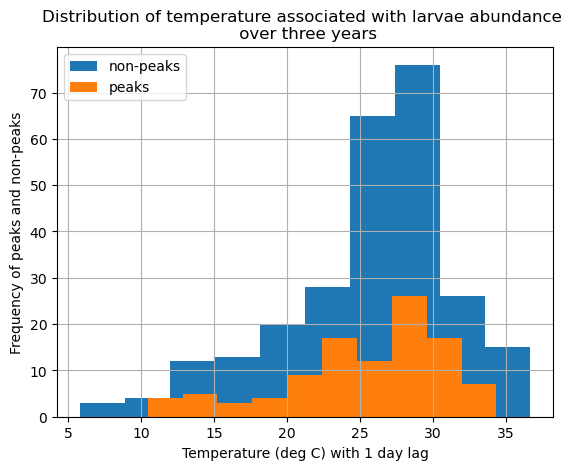

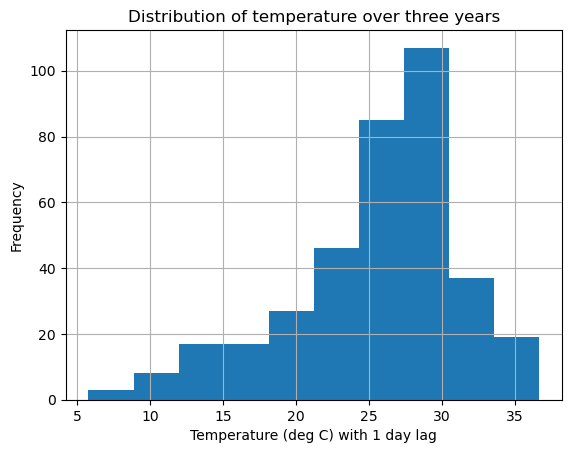

In [38]:
probdist('temp1')

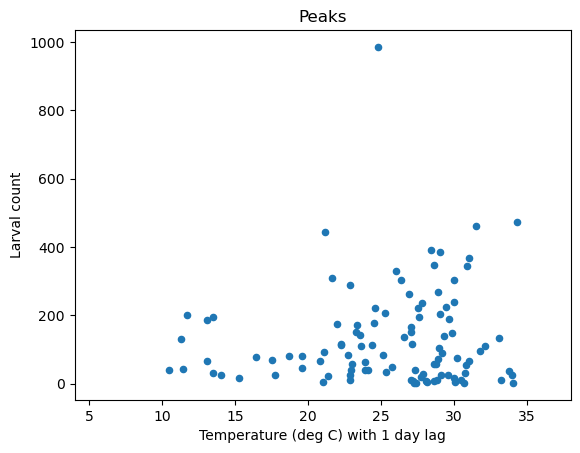

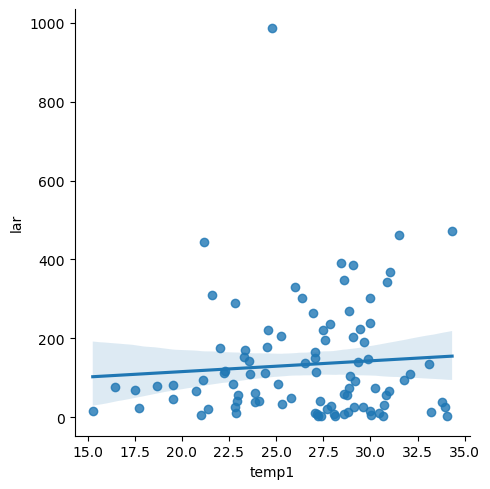

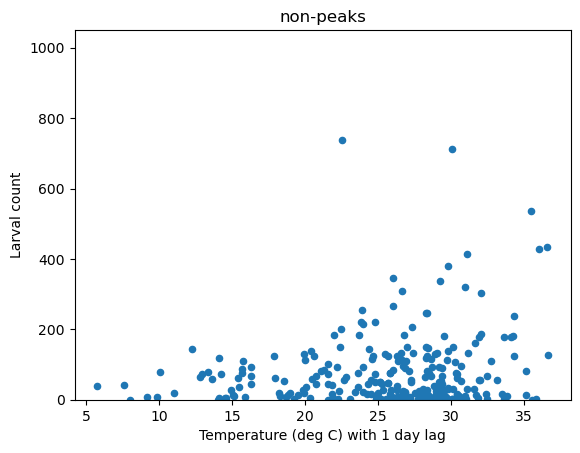

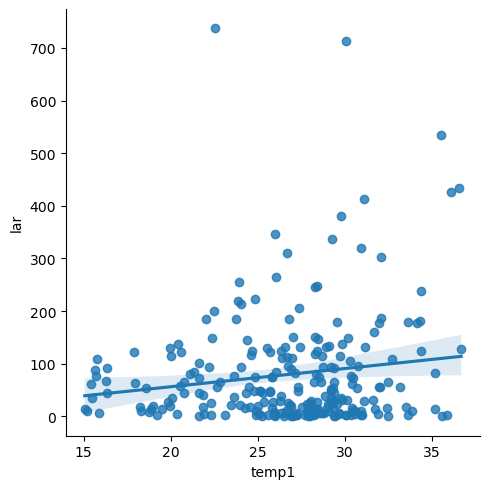

In [57]:
d1 = dflar1.rename(columns={0:'lar'})
dflar1[dflar1['bool']=='true'].plot(x='temp1',y=0,kind='scatter',title='Peaks',xlim=(4,38),ylabel='Larval count',xlabel='Temperature (deg C) with 1 day lag')
sns.lmplot(x='temp1',y='lar', data = d1[(d1['bool']=='true')&(d1['temp1']>=15)])
dflar1[dflar1['bool']=='false'].plot(x='temp1',y=0,kind='scatter',ylim=(0,1050),title='non-peaks',ylabel='Larval count',xlabel='Temperature (deg C) with 1 day lag')
sns.lmplot(x='temp1',y='lar', data = d1[(d1['bool']=='false')&(d1['temp1']>=15)])

In [14]:
dflar1[dflar1['bool']=='true'][['meantemp',0]].corr(method='spearman')

meantemp         0
meantemp  1.000000  0.672371
0         0.672371  1.000000

# Probability approach to find rainfall thresholds

In [17]:
def prob(boolean,rvar,tvar):
    from itertools import pairwise
    fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(6,20))

#     rainint = [0,1,2,3,4,5,10,15,20,25,30,40,80,100]
    tempint = [65,70,75,80,85,90,95,100,105]
    s= -2
    for j in range(2003,2006):
        s=s+1
        rainint = sorted(list(dict.fromkeys(rain[(rain.time.dt.year==j)&(rain.time.dt.month.isin(range(6,10)))].values)))
        dflar2 = dflar1[dflar1.index.year==j]
        nrgrtint = [len(dflar2[dflar2[rvar]>i]) if i!=max(rainint) else len(dflar2[dflar2[rvar]==i]) for i in rainint]
        ntgrtint = [len(dflar2[dflar2[tvar]>=i]) for i in tempint]
        lenjoint= [len(dflar2[(dflar2['rain2']>=i)&(dflar2['rain1']>rainint[-15])]) for i in rainint]
        
        print([dflar2[(dflar2['rain2']<=i)&(dflar2['bool']=='true')]['rain1'].max() for i in rainint])
        
        nopeaks_rgrtint=[]
        joint=[]
        for i in rainint:
            dfjoint  = dflar2[(dflar2['rain2']>=i)&(dflar2['rain1']>rainint[-15])]
            ljoint = len(dfjoint[dfjoint['bool']==boolean])
            nopeaks_rgrtint.append(len(dflar2[(dflar2[rvar]>i)&(dflar2['bool']==boolean)]))
            joint.append(ljoint)
        print(nrgrtint,nopeaks_rgrtint)
        
        prob = [(nopeaks_rgrtint[i]/nrgrtint[i])*(len(dflar2[dflar2[rvar]>0])/len(dflar2)) for i in range(len(nrgrtint))]
        probjoint = [joint[i]/lenjoint[i] for i in range(len(lenjoint)-8)]
        
        ax[3].plot(rainint[:-8],probjoint,marker='x')
        ax[0].plot(rainint[:],prob,marker='x')
        ax[0].legend(range(2003,2006))
        ax[0].set_ylabel('Probability of larvae peaks',fontsize=14)
        ax[0].set_xlabel('Rainfall (mm)',fontsize=14)
#         ax[0].set_title('Probability of peaks occuring in larvae \n given the rainfall is greater than a threshold')
        print(pearsonr(rainint[:],prob))
        nopeaks_tgrtint=[]
#         for k in tempint:
#             dfnopeaks1 = dflar2[dflar2[tvar]>=k]
#             l1 = len(dfnopeaks1[dfnopeaks1['bool']==boolean])
#             nopeaks_tgrtint.append(l1)
#         print(ntgrtint,nopeaks_tgrtint)
#         try:
#             prob1 = [nopeaks_tgrtint[i]/ntgrtint[i] for i in range(len(ntgrtint)-2)]
#             ax[1].plot(tempint[:-2],prob1,marker='x')
#         except:
#             prob1 = [nopeaks_tgrtint[i]/ntgrtint[i] for i in range(len(ntgrtint)-4)]
#             ax[1].plot(tempint[:-4],prob1,marker='x')
#         ax[1].legend(range(2003,2006))
#         ax[1].set_ylabel('Probability of larvae peaks',fontsize=14)
#         ax[1].set_xlabel('Threshold temp')
#         ax[1].set_title('Probability of peaks occuring in larvae \n given the temp is greater than a threshold')
#         ax[2].plot(tempint[:-1],[x - y for x, y in pairwise(ntgrtint)], marker='*')
        
    

In [16]:
dflar1[dflar1['rain2']>=35][['rain1','rain2']]

rain1      rain2
DATE                            
2003-07-11   0.000000  89.300003
2003-07-19   0.000000  37.066666
2003-08-31   0.000000  40.266666
2003-09-02  27.455555  68.433334
2003-09-28   0.000000  35.688889
2004-06-12   1.244444  90.433327
2005-06-15   0.000000  40.344440
2005-09-27   0.000000  35.077778

<AxesSubplot:xlabel='meantemp', ylabel='0'>

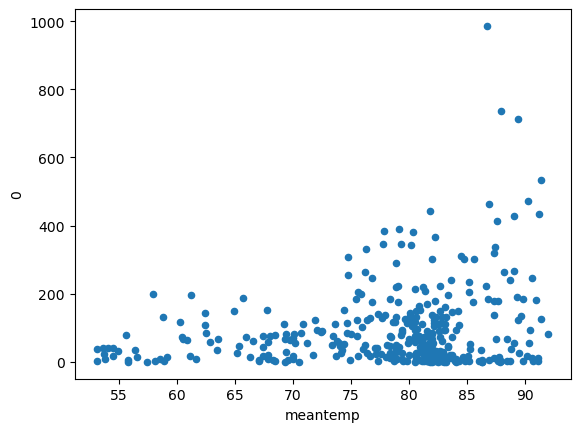

In [17]:
dflar1.plot(x='meantemp',y=0,kind='scatter')

# precipitation systems, Precipitation maps- How the rainfall distribution is, what percentage of area with rainfall in parts of the graph

[13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 13.655556, 27.455555, 27.455555]
[41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 1] [8, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
PearsonRResult(statistic=-0.7978905307932487, pvalue=4.1941637123911045e-10)
[5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.2999997, 5.29

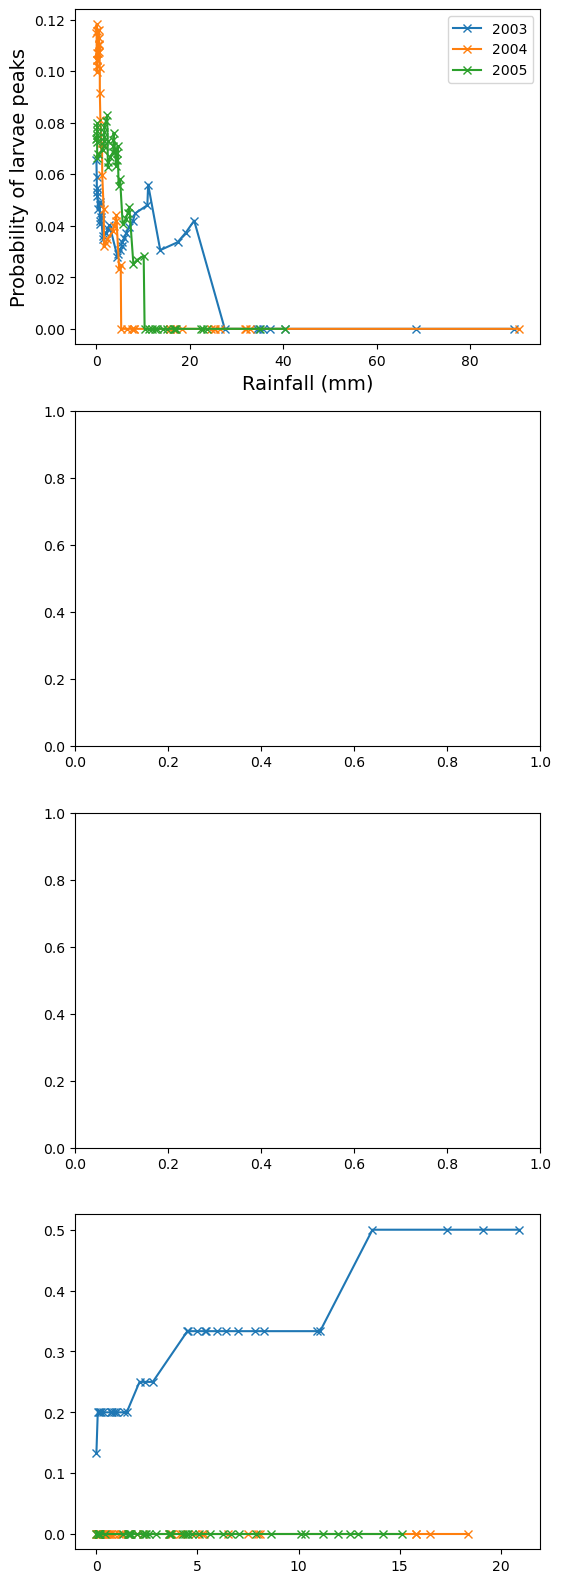

In [18]:
prob('true','rain1','temp2')

In [10]:
from sklearn.model_selection import train_test_split
 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
df = pd.get_dummies(dflar1,drop_first=True)


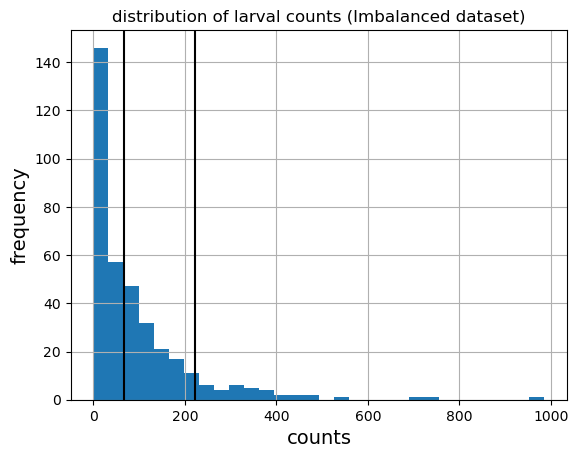

In [11]:
df[0].hist(bins=30)
plt.title('distribution of larval counts (Imbalanced dataset)')
plt.ylabel('frequency',fontsize=14)
plt.xlabel('counts',fontsize=14)
plt.axvline(np.percentile(df[0],57),color='black')
plt.axvline(np.percentile(df[0],90),color='black')

In [11]:

df['cat']='L'
for i in range(len(df['cat'])):
    if(df[0][i]>=np.percentile(df[0],57) and df[0][i]<np.percentile(df[0],90)):
        df['cat'][i]='M'
    elif(df[0][i]>=np.percentile(df[0],90)):
        df['cat'][i]='H'

/tmp/ipykernel_116174/3915527768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat'][i]='M'
/tmp/ipykernel_116174/3915527768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat'][i]='H'


In [120]:
np.percentile(df[0],90)

222.0

Text(0.5, 0, 'categories')

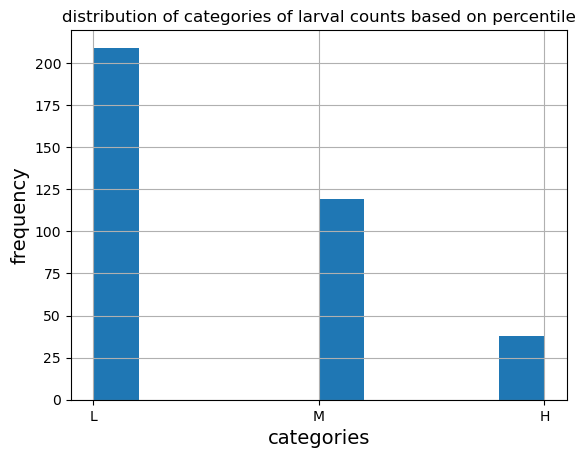

In [14]:
df['cat'].hist()
plt.title('distribution of categories of larval counts based on percentile')
plt.ylabel('frequency',fontsize=14)
plt.xlabel('categories',fontsize=14)

Text(0, 0.5, 'Maxtemp7 (C)')

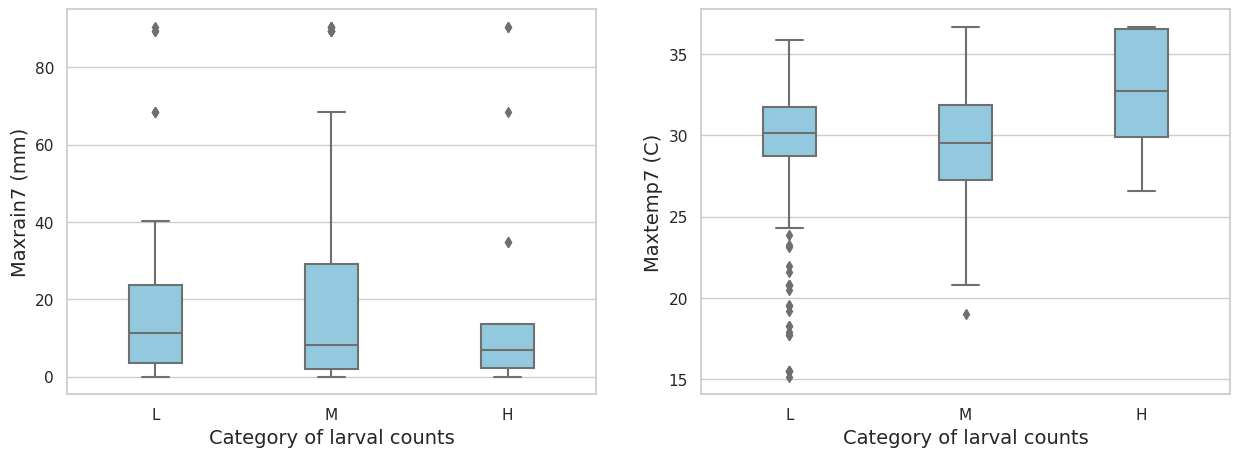

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot( x = 'cat',y = 'maxrain7', data = df, order=['L','M','H'], color='skyblue', width=.3, ax = axs[0])
axs[0].set_xlabel('Category of larval counts',fontsize=14)
axs[0].set_ylabel('Maxrain7 (mm)',fontsize=14)

sns.boxplot( x = 'cat',y = 'maxtemp7', data = df, order=['L','M','H'], color='skyblue', width=.3, ax = axs[1])
axs[1].set_xlabel('Category of larval counts',fontsize=14)
axs[1].set_ylabel('Maxtemp7 (C)',fontsize=14)
# plt.title('Distribution of max. rainfall over 7 days \n grouped by larval categories')

In [110]:
df.to_csv('/data/dhence/a/pborse2/R_testfile')

In [12]:

import pandas as pd
from sklearn.datasets import fetch_openml

from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectPercentile(mutual_info_classif, percentile=8)
X_reduced = selector.fit_transform(df.drop(columns=[0,'bool_true','cat']), df['cat'])
X_reduced.shape


(366, 3)

In [13]:

cols = selector.get_support(indices=True)
selected_columns =df.drop(columns=[0,'bool_true','cat']).iloc[:,cols].columns.tolist()
selected_columns


['maxrain6', 'maxrain7', 'maxtemp7']

maxrain2 maxtemp2 0.44594594594594594 DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)


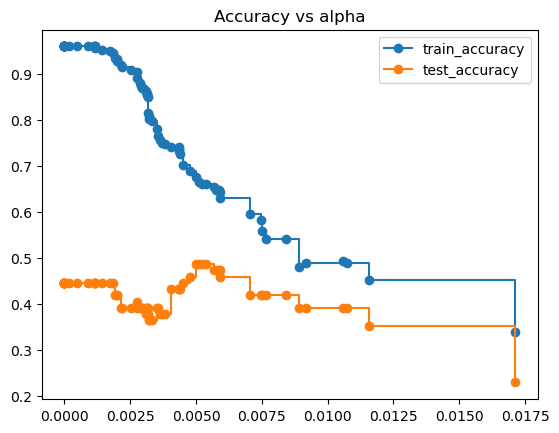

maxrain2 maxtemp3 0.47297297297297297 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


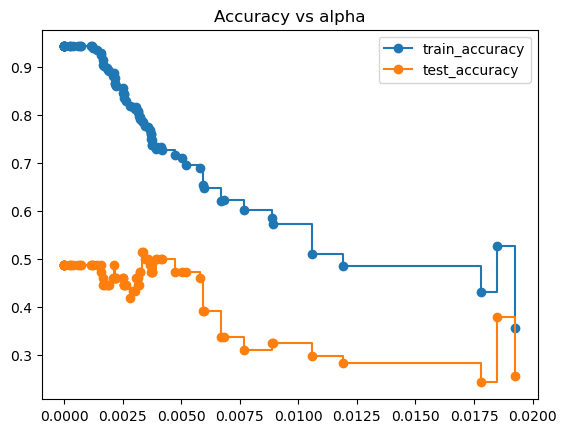

maxrain2 maxtemp4 0.43243243243243246 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


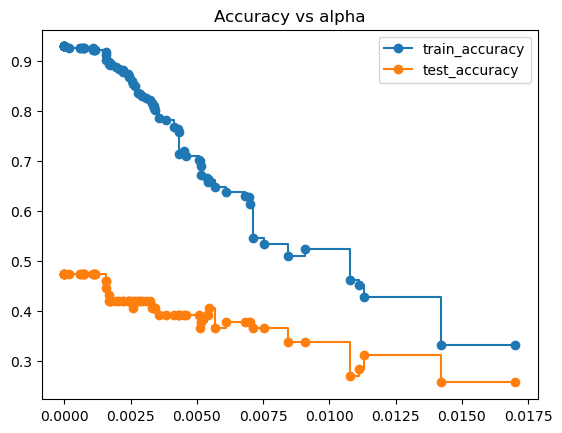

maxrain2 maxtemp5 0.4594594594594595 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


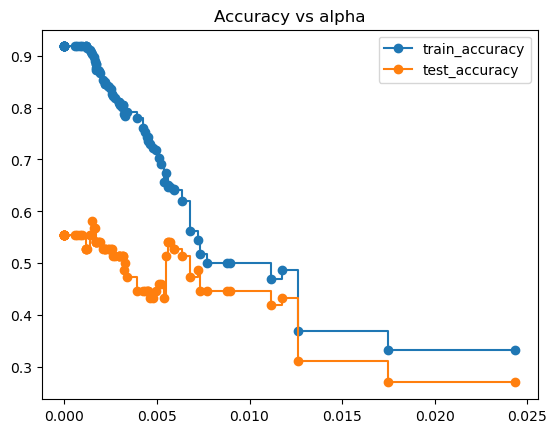

maxrain2 maxtemp6 0.47297297297297297 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


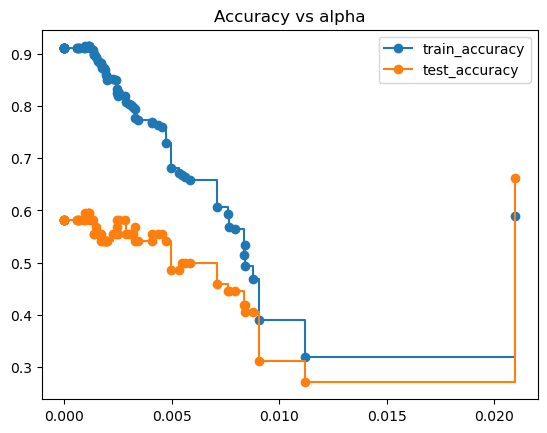

maxrain2 maxtemp7 0.5540540540540541 DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)


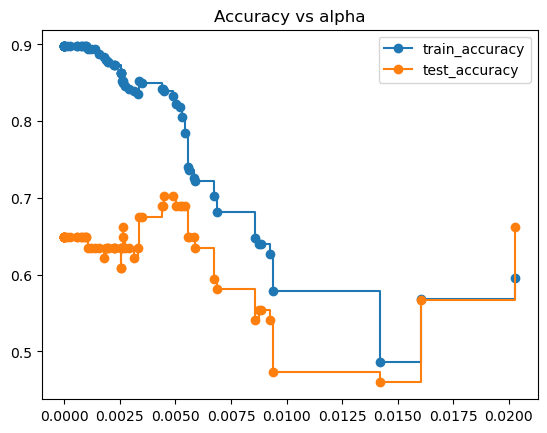

maxrain3 maxtemp2 0.527027027027027 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


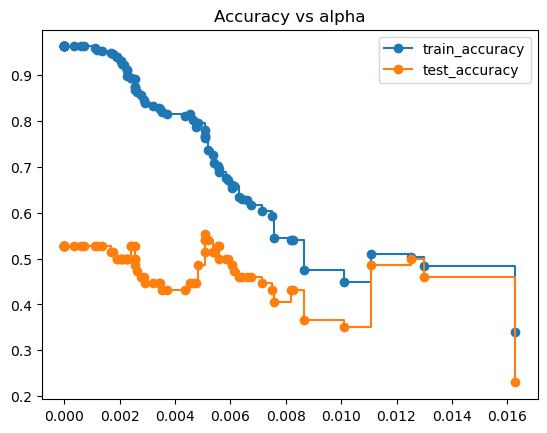

maxrain3 maxtemp3 0.43243243243243246 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


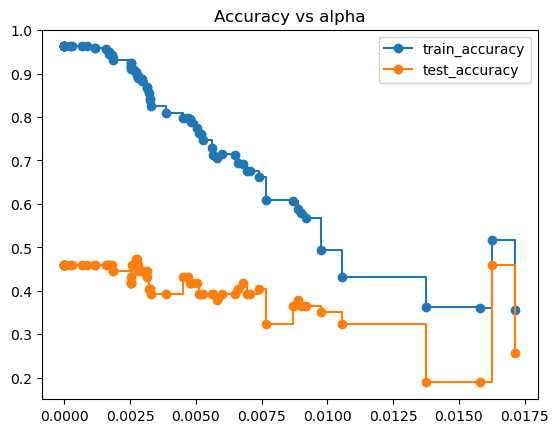

maxrain3 maxtemp4 0.5 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


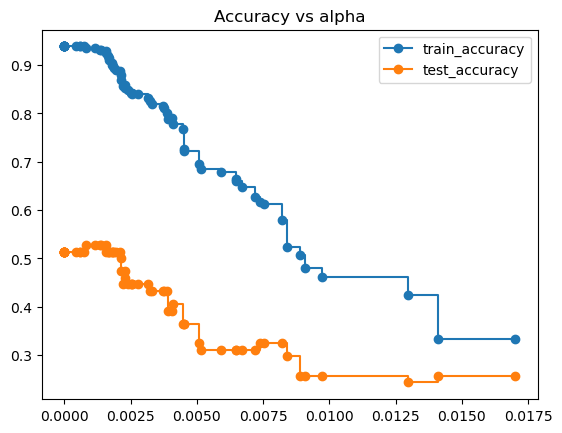

maxrain3 maxtemp5 0.5 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


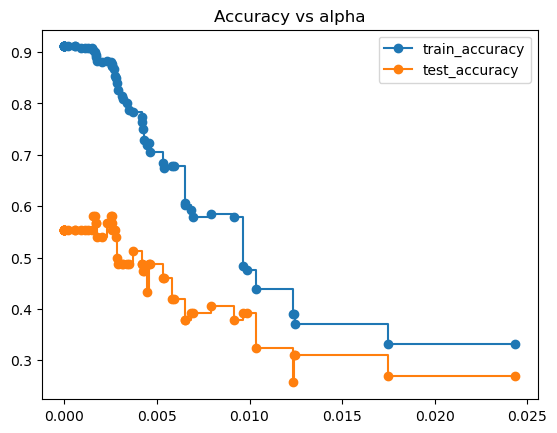

maxrain3 maxtemp6 0.5 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


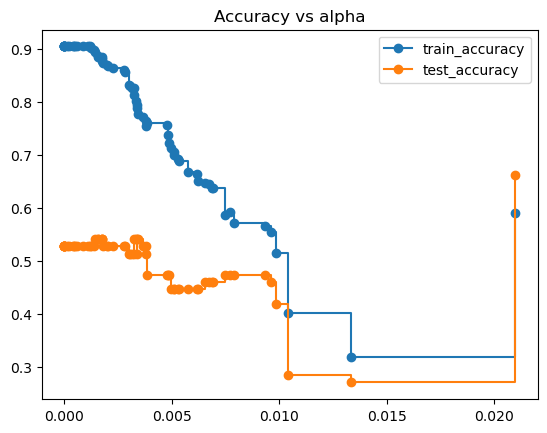

maxrain3 maxtemp7 0.5675675675675675 DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)


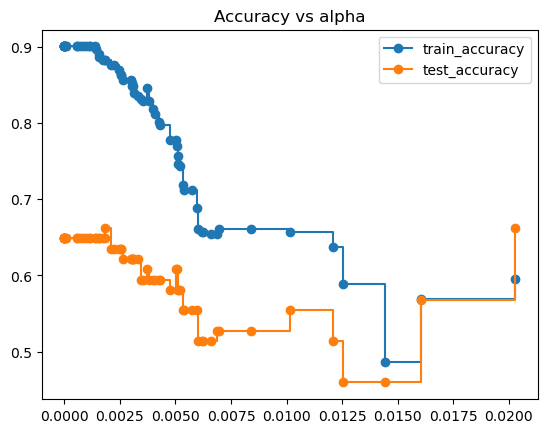

maxrain4 maxtemp2 0.527027027027027 DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)


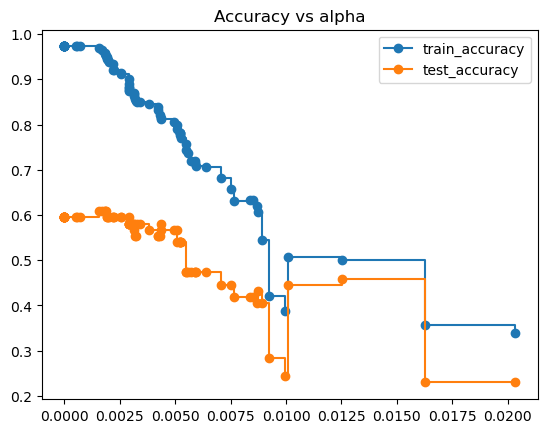

maxrain4 maxtemp3 0.47297297297297297 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


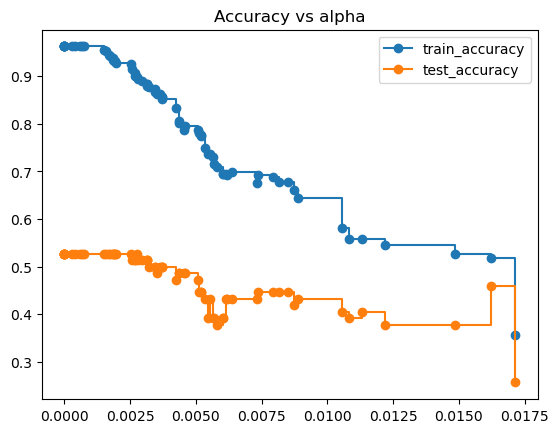

maxrain4 maxtemp4 0.4864864864864865 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


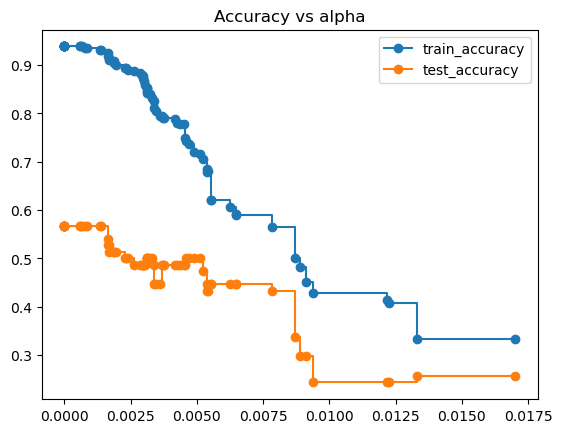

maxrain4 maxtemp5 0.6351351351351351 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


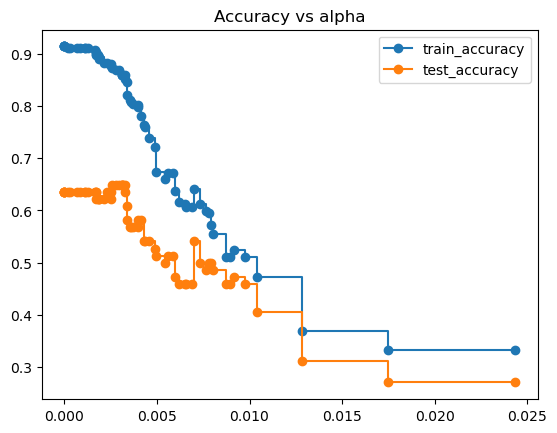

maxrain4 maxtemp6 0.5405405405405406 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


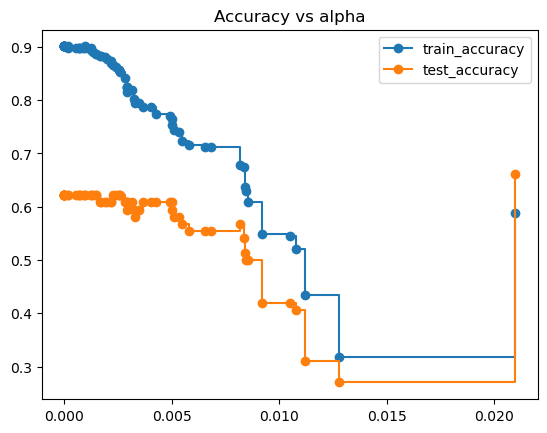

maxrain4 maxtemp7 0.5675675675675675 DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)


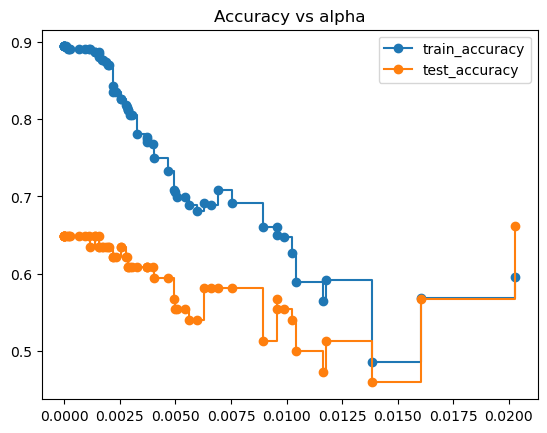

maxrain5 maxtemp2 0.581081081081081 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


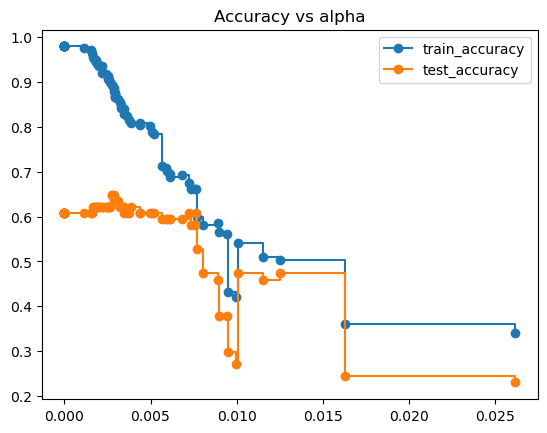

maxrain5 maxtemp3 0.6756756756756757 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


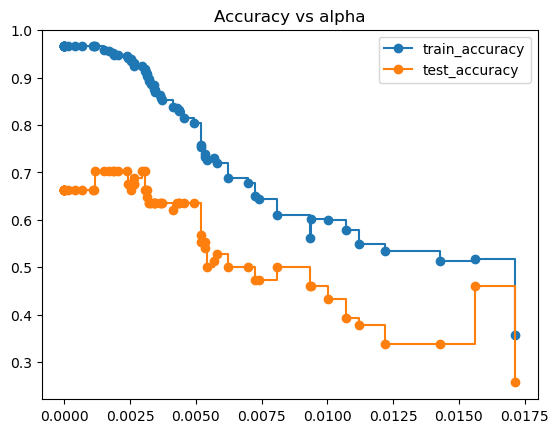

maxrain5 maxtemp4 0.581081081081081 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


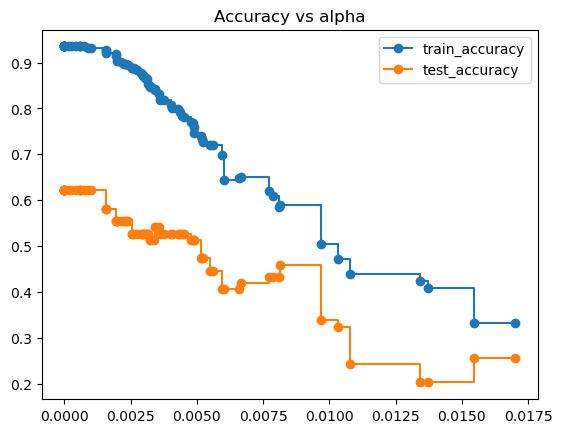

maxrain5 maxtemp5 0.5945945945945946 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


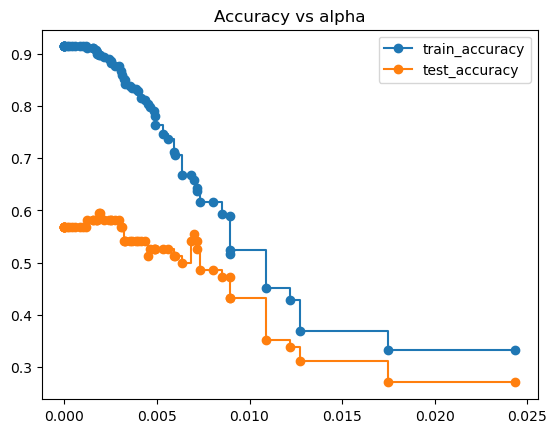

maxrain5 maxtemp6 0.5405405405405406 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


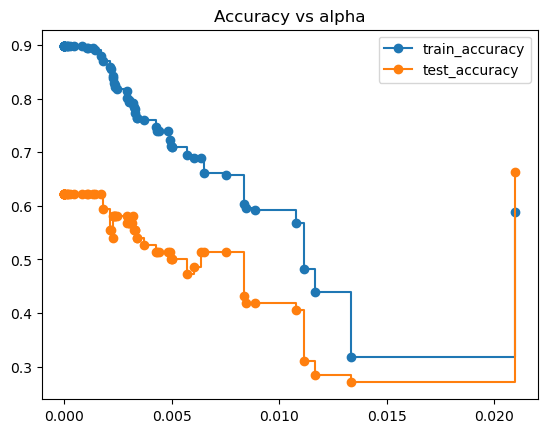

maxrain5 maxtemp7 0.5540540540540541 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


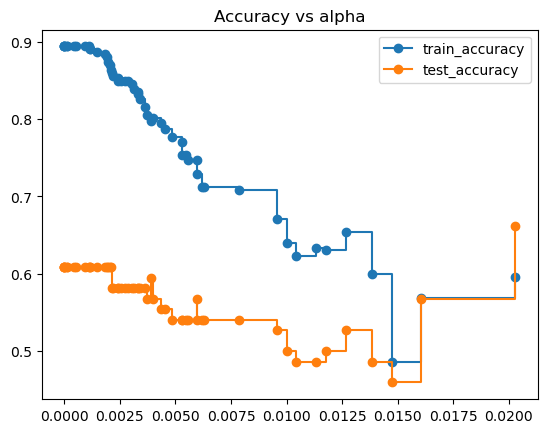

maxrain6 maxtemp2 0.5135135135135135 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


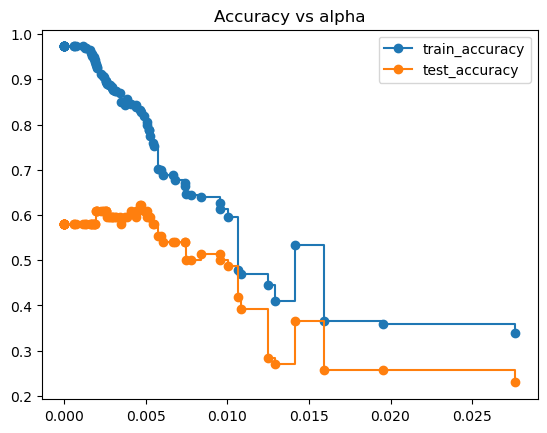

maxrain6 maxtemp3 0.6081081081081081 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


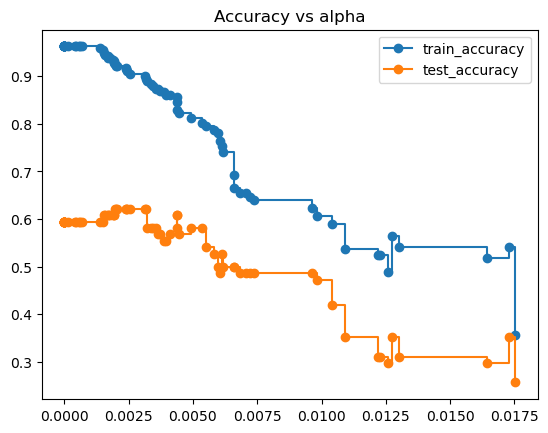

maxrain6 maxtemp4 0.6216216216216216 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


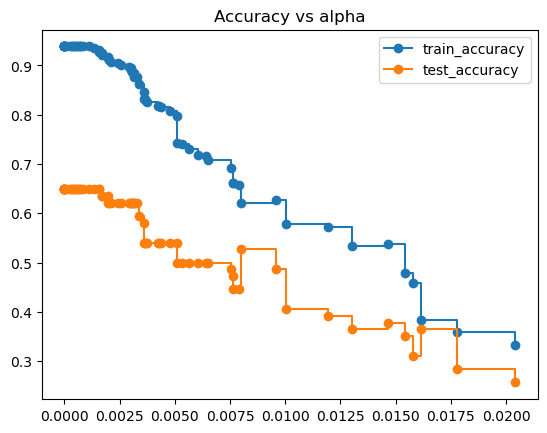

maxrain6 maxtemp5 0.6486486486486487 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


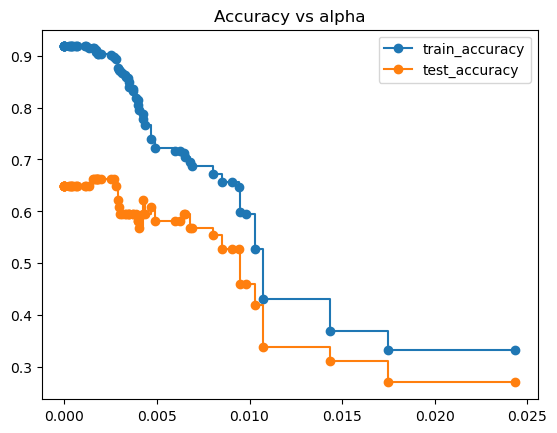

maxrain6 maxtemp6 0.5135135135135135 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


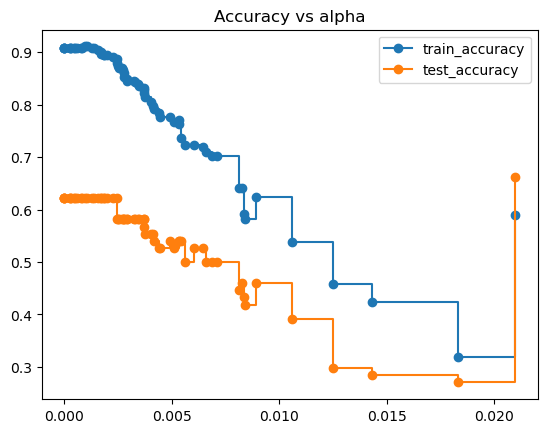

maxrain6 maxtemp7 0.581081081081081 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


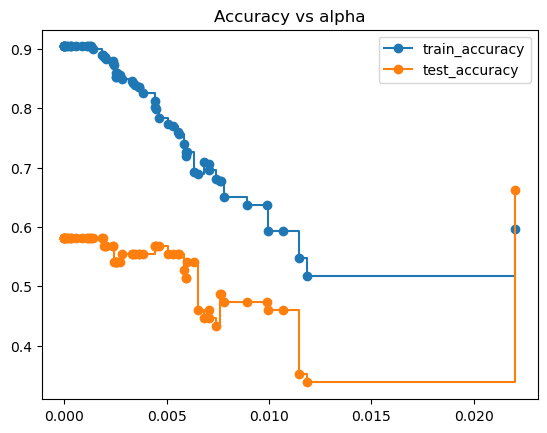

maxrain7 maxtemp2 0.6216216216216216 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


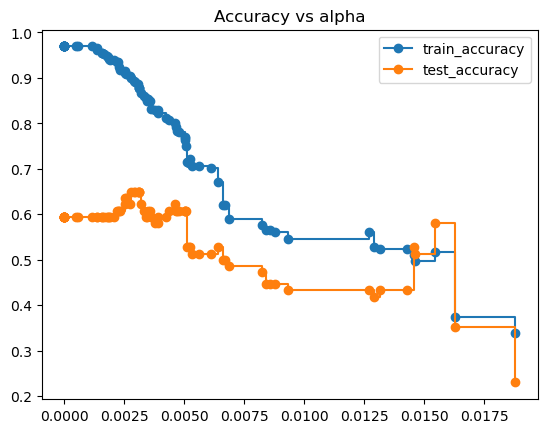

maxrain7 maxtemp3 0.6081081081081081 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


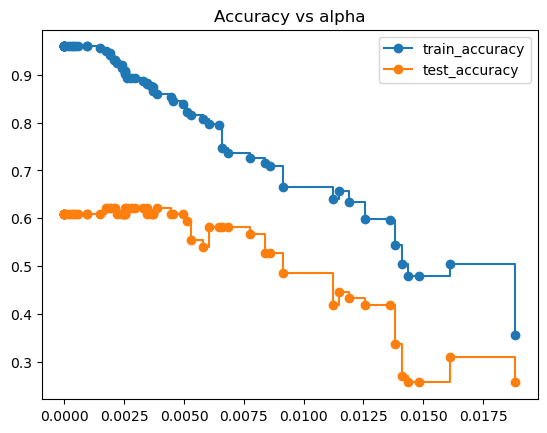

maxrain7 maxtemp4 0.5675675675675675 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


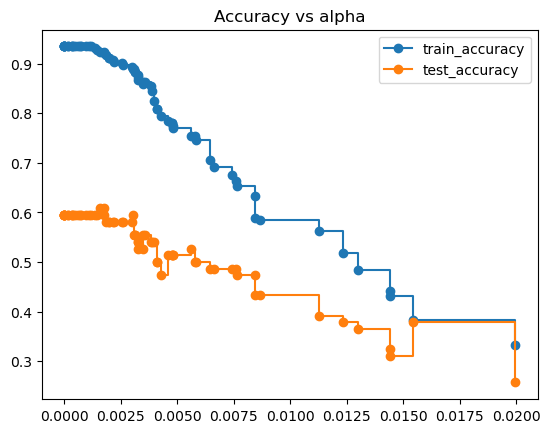

maxrain7 maxtemp5 0.5945945945945946 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


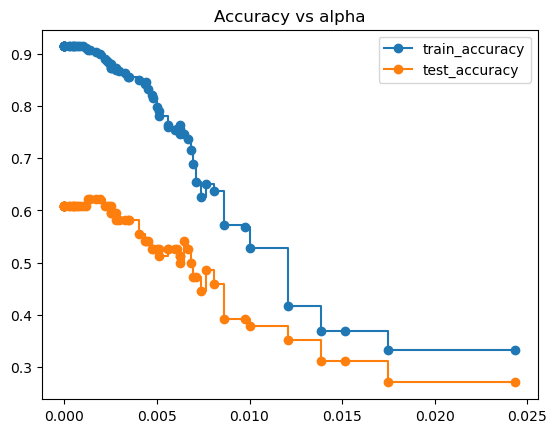

maxrain7 maxtemp6 0.6486486486486487 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


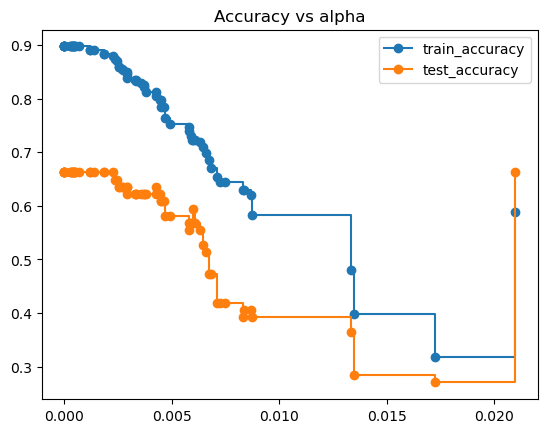

maxrain7 maxtemp7 0.527027027027027 DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


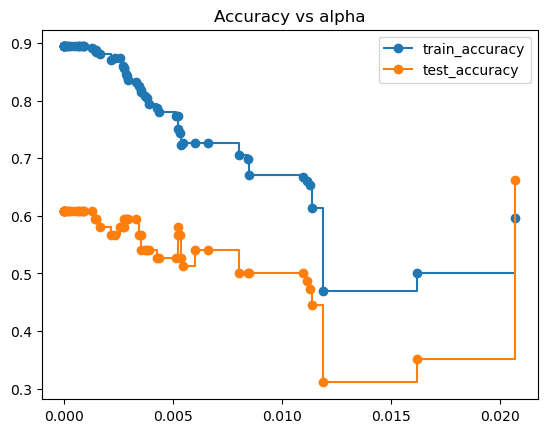

In [16]:
## Decision tree pruning using hyperparameter tuning and learning rate tuning


for i in ['maxrain'+str(k) for k in range(2,8)]:
    for j in ['maxtemp'+str(k) for k in range(2,8)]:
        X = df.copy(deep=True)[['cat',i,j]]
        y = X['cat']
        del X['cat']
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
        
        dt = DecisionTreeClassifier(random_state=0,class_weight='balanced')
        
        param_grid=dict(max_depth=range(3,10))
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
        grid = GridSearchCV(estimator= dt, param_grid=param_grid, n_jobs=-1, cv=cv)
        grid.fit(X_train, y_train)
        grid_result = grid.best_estimator_.fit(X_train, y_train)
        y_train_pred = grid_result.predict(X_train)
        y_test_pred = grid_result.predict(X_test)
        
        print(i,j,accuracy_score(y_test_pred,y_test),grid.best_estimator_)
        
        
        path = dt.cost_complexity_pruning_path(X_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities
        ccp_alphas = ccp_alphas[np.where(ccp_alphas>0)]
        dts = []
        for ccp_alpha in ccp_alphas:
            dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
            dt.fit(X_train, y_train)
            dts.append(dt)
        clfs = dts[:-1]
        ccp_alphas = ccp_alphas[:-1]
        node_counts = [clf.tree_.node_count for clf in clfs]
        depth = [clf.tree_.max_depth for clf in clfs]
#         plt.scatter(ccp_alphas,node_counts)
#         plt.scatter(ccp_alphas,depth)
#         plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
#         plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
#         plt.legend()
#         plt.show()
        train_acc = []
        test_acc = []
        for c in clfs:
            y_train_pred = c.predict(X_train)
            y_test_pred = c.predict(X_test)
            train_acc.append(accuracy_score(y_train_pred,y_train))
            test_acc.append(accuracy_score(y_test_pred,y_test))

        plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post",marker='o')
        plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post",marker='o')
        plt.legend()
        plt.title('Accuracy vs alpha')
#         plt.scatter(depth,train_acc,label='train_accuracy',marker='*',c=ccp_alphas,cmap='plasma')
#         plt.scatter(depth,test_acc,label='test_accuracy',marker='o',c=ccp_alphas,cmap='plasma')
#         for k in range(len(ccp_alphas)):
#             plt.annotate(ccp_alphas[k], (depth[k], test_acc[k]))
#         plt.legend()
#         plt.title('Accuracy vs depth')
#         plt.colorbar()
        plt.show()
#         y_test_pred = model.predict(X_test)


In [1]:
##### Evaluating performance of pruned model

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
##### K-FOLD CROSS VALIDATION



X = df.copy(deep=True)[['cat','maxrain5','maxtemp3']]

y = X['cat']

del X['cat']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

dt1 = DecisionTreeClassifier(random_state=0,ccp_alpha=0.0035)

param_grid1= dict(max_depth=range(3,10))
cv1 = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
grid1 = GridSearchCV(estimator= dt1, param_grid=param_grid1, n_jobs=-1, cv=cv1)
grid_result1 = grid1.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
# report all configurations
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

    
    
# dt1.fit(X_train,y_train)
y_train_pred = grid_result1.best_estimator_.predict(X_train)
y_test_pred = grid_result1.best_estimator_.predict(X_test)
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

# tree.plot_tree(dt1.estimators_[0])



print(f'Train score {accuracy_score(y_train_pred,y_train)}')

sns.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size":18},yticklabels=['H','L','M'],xticklabels=['H','L','M'])
plt.show()
sns.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size":18})

NameError: name 'df' is not defined

In [13]:
#### NESTED CROSS VALIDATION 


cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
models=[]
for train_ix, test_ix in cv_outer.split(X):
    # split data
    X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
    y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    # configure the cross-validation procedure
    dt1 = DecisionTreeClassifier(ccp_alpha=0.0052,class_weight='balanced')
    param_grid=dict(max_depth=range(3,8))
    cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=4, random_state=0)
    grid = GridSearchCV(estimator=dt1, param_grid=param_grid, n_jobs=-1, cv=cv)
    grid_result = grid.fit(X_train, y_train)
    # get the best performing model fit on the whole training set
    best_model = grid_result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)
    # evaluate the model
    acc = accuracy_score(y_test, yhat)
    # store the result
    outer_results.append(acc)
    models.append(best_model)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, grid_result.best_score_, grid_result.best_params_))
    # summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))


>acc=0.351, est=0.477, cfg={'max_depth': 7}
>acc=0.541, est=0.520, cfg={'max_depth': 7}
>acc=0.405, est=0.500, cfg={'max_depth': 7}
>acc=0.351, est=0.437, cfg={'max_depth': 7}
>acc=0.568, est=0.533, cfg={'max_depth': 7}
>acc=0.541, est=0.505, cfg={'max_depth': 7}
>acc=0.528, est=0.484, cfg={'max_depth': 7}
>acc=0.444, est=0.518, cfg={'max_depth': 7}
>acc=0.556, est=0.493, cfg={'max_depth': 7}
>acc=0.528, est=0.470, cfg={'max_depth': 7}
Accuracy: 0.481 (0.081)


In [141]:
param_grid=dict(max_depth=range(5,8))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
grid = GridSearchCV(estimator=dt1, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_result = grid.fit(X, y)
grid_result.best_score_

0.5045983483483484

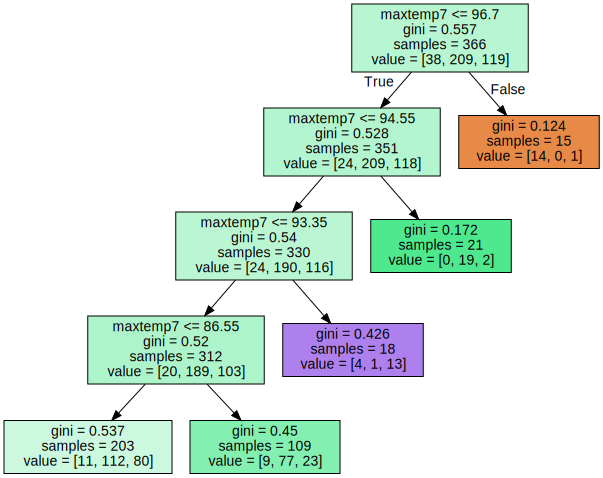

In [19]:
from graphviz import Source
 
from sklearn import tree
 
from IPython.display import SVG
from IPython.display import display 
 
import scipy.stats as sstats
graph = Source(tree.export_graphviz(grid_result.best_estimator_, out_file=None,filled=True, feature_names=X.columns),format='png')

SVG(graph.pipe(format='svg'))
# tree.plot_tree(dt1,filled=True)
# plt.savefig('/data/dhence/a/pborse2/inputdata/out.pdf')

maxrain2 maxtemp2


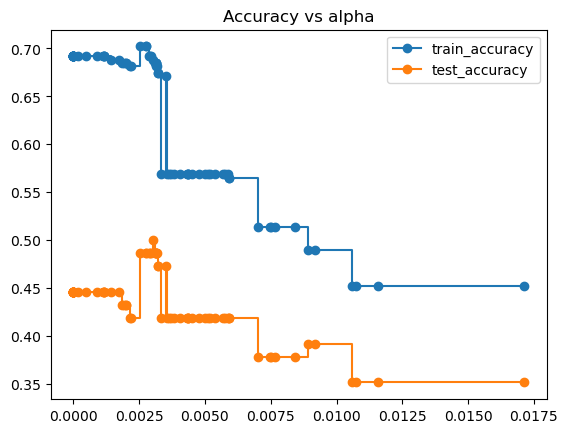

maxrain2 maxtemp3


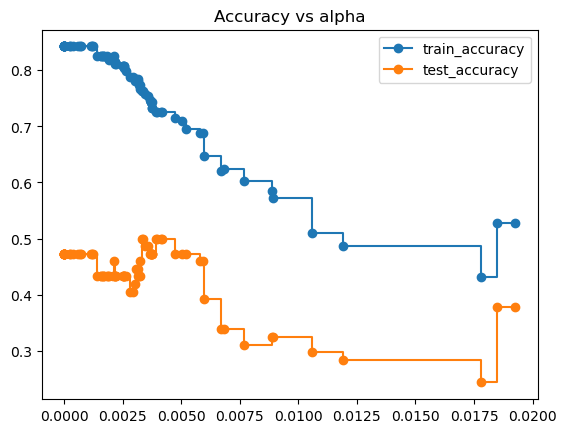

maxrain2 maxtemp4


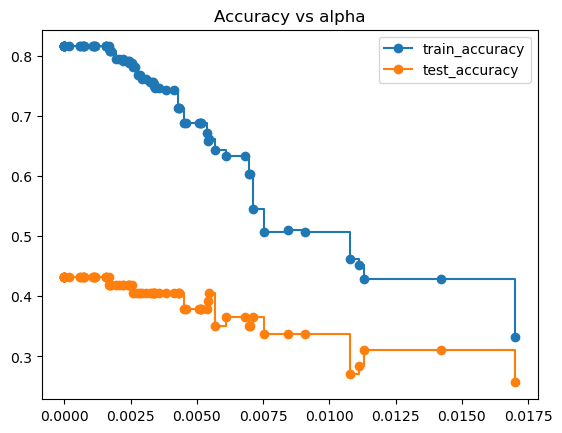

maxrain2 maxtemp5


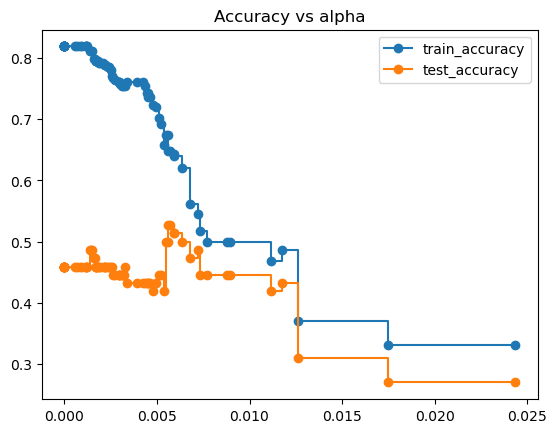

maxrain2 maxtemp6


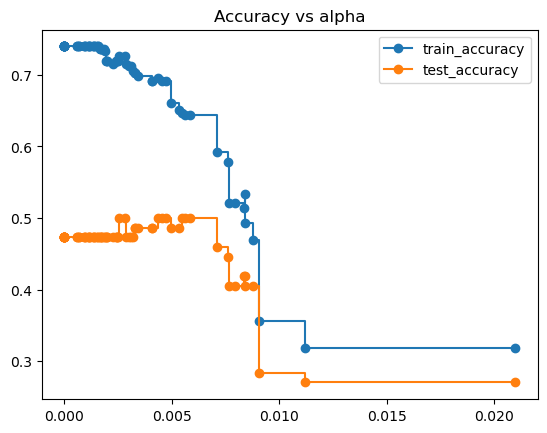

maxrain2 maxtemp7


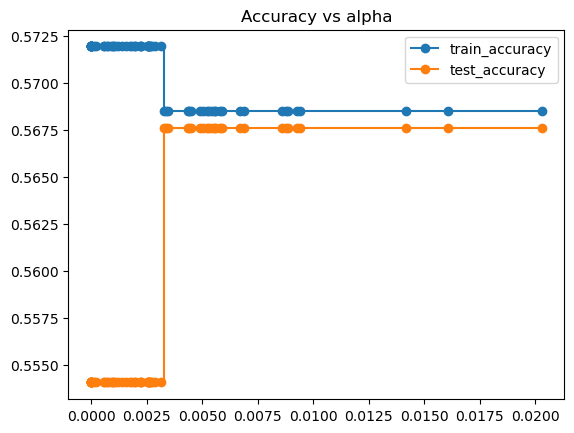

maxrain3 maxtemp2


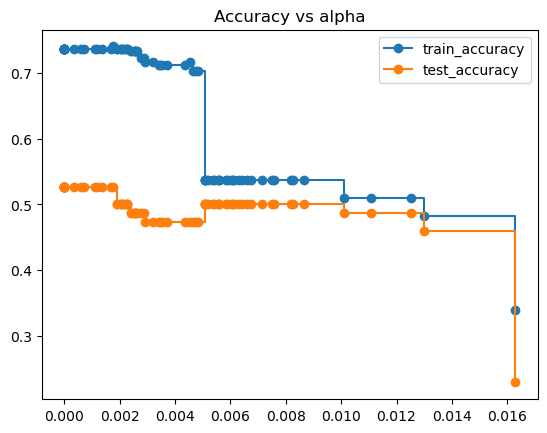

maxrain3 maxtemp3


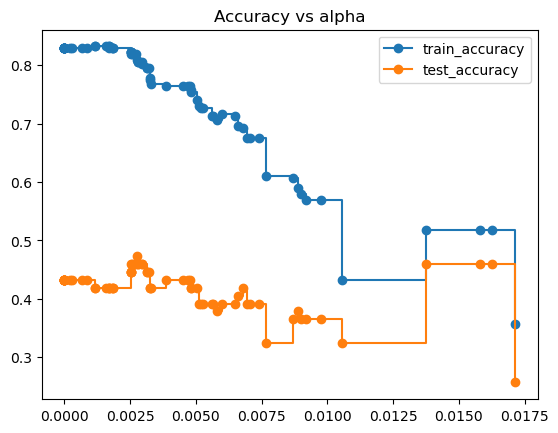

maxrain3 maxtemp4


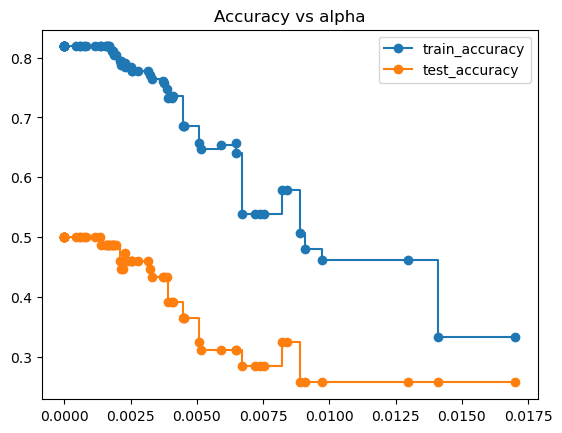

maxrain3 maxtemp5


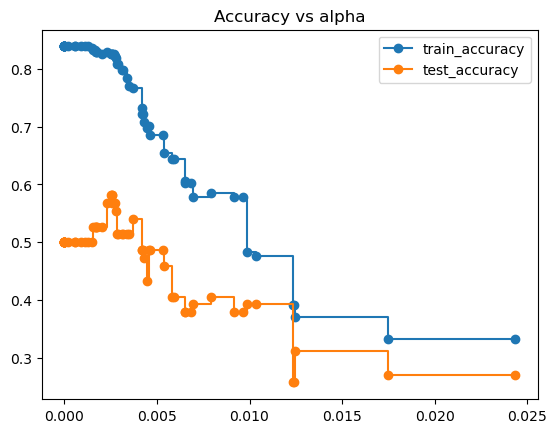

maxrain3 maxtemp6


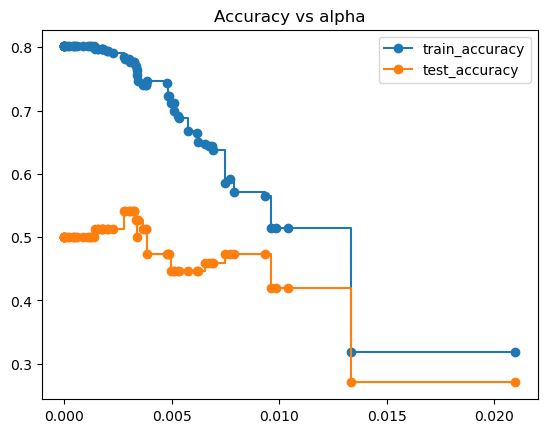

maxrain3 maxtemp7


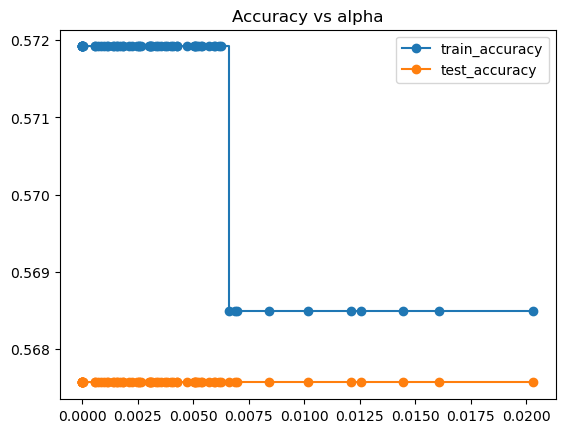

maxrain4 maxtemp2


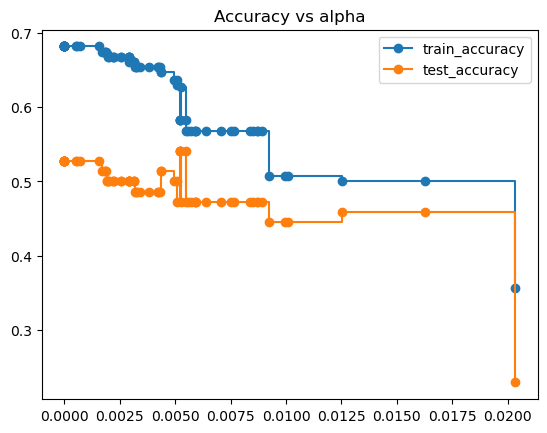

maxrain4 maxtemp3


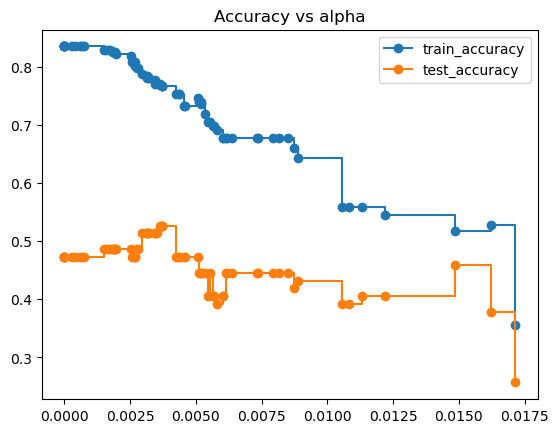

maxrain4 maxtemp4


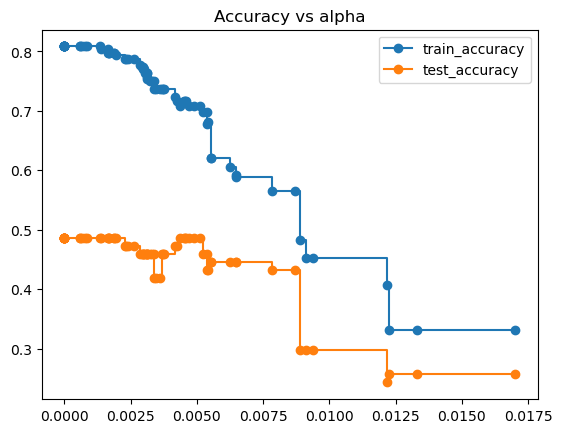

maxrain4 maxtemp5


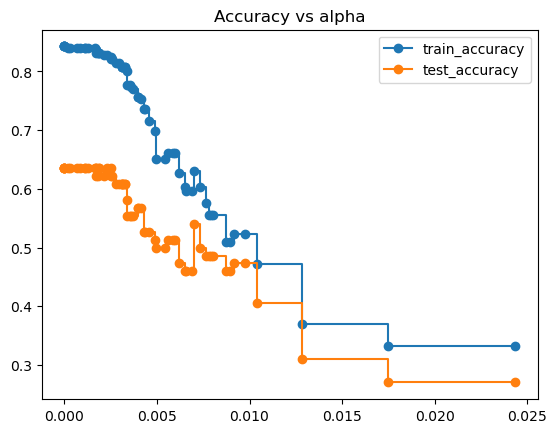

maxrain4 maxtemp6


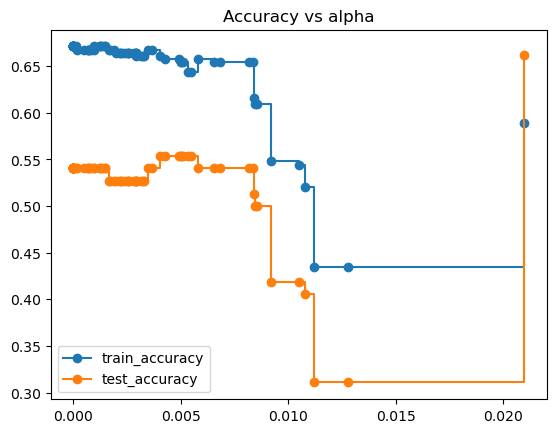

maxrain4 maxtemp7


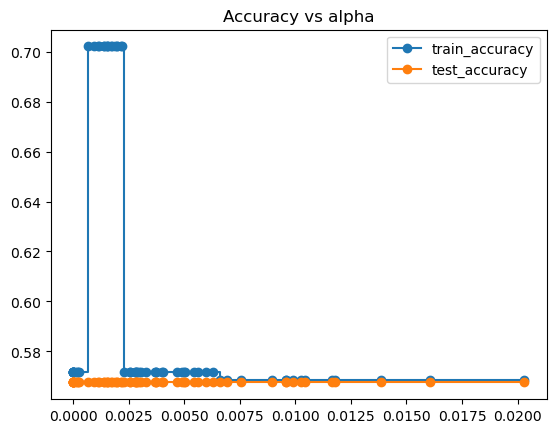

maxrain5 maxtemp2


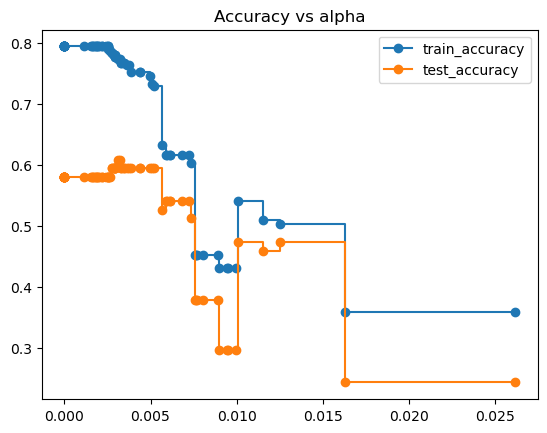

maxrain5 maxtemp3


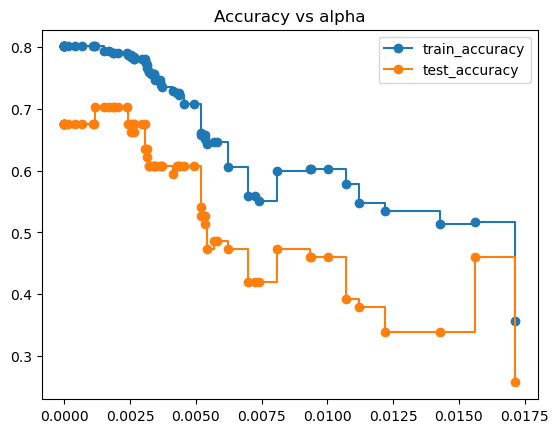

maxrain5 maxtemp4


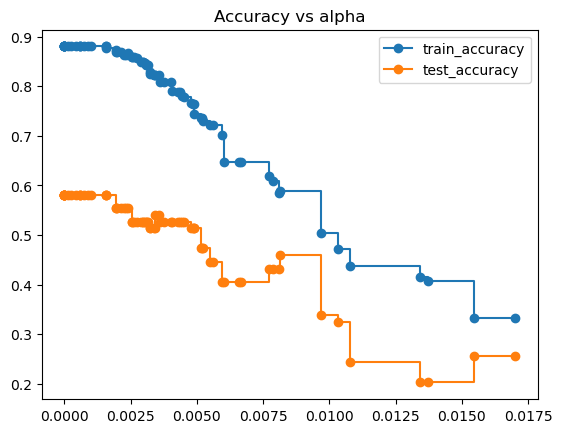

maxrain5 maxtemp5


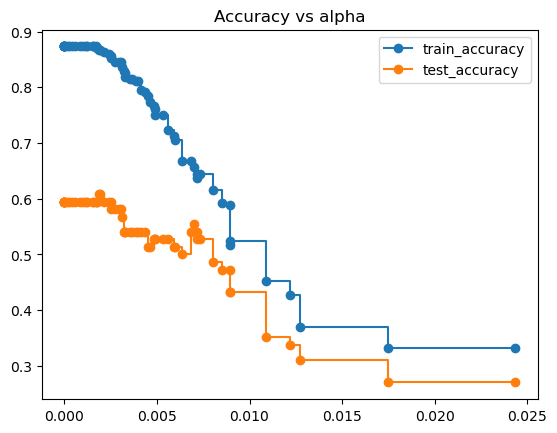

maxrain5 maxtemp6


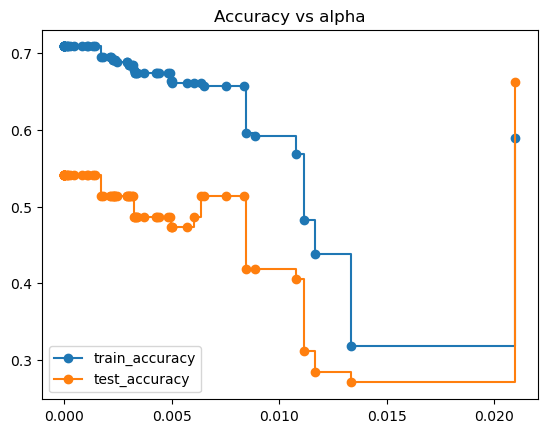

maxrain5 maxtemp7


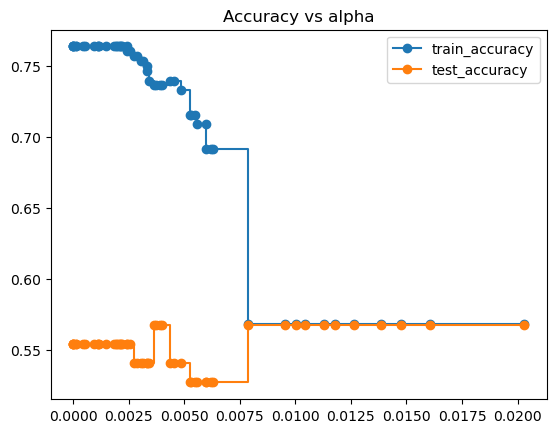

maxrain6 maxtemp2


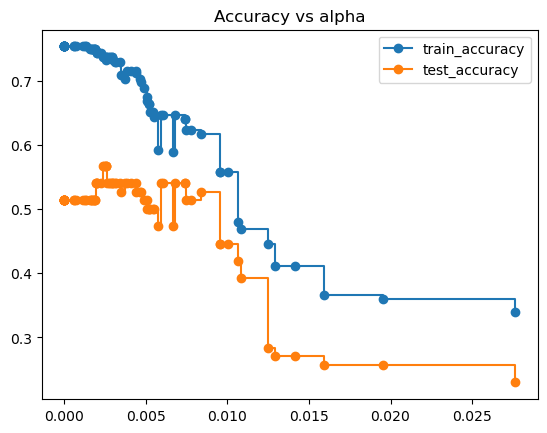

maxrain6 maxtemp3


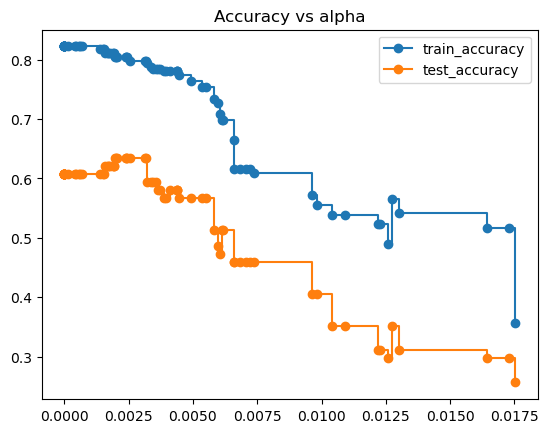

maxrain6 maxtemp4


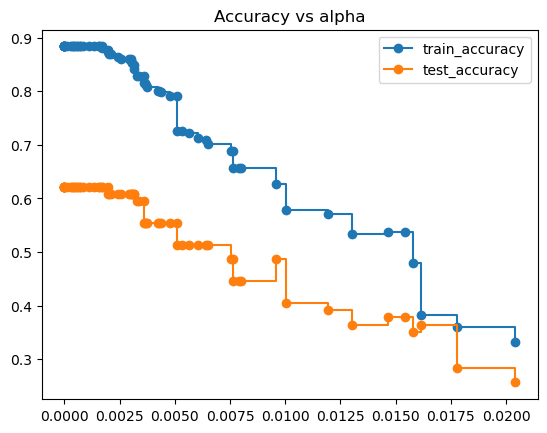

maxrain6 maxtemp5


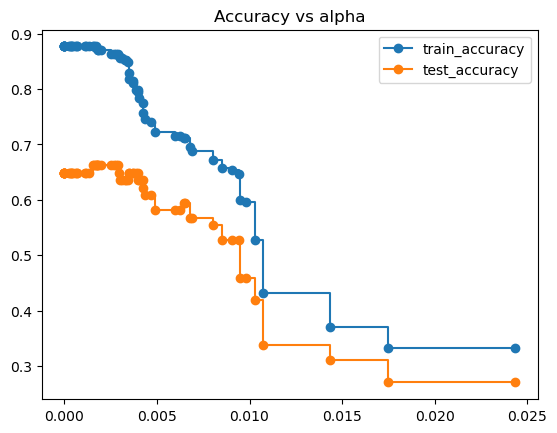

maxrain6 maxtemp6


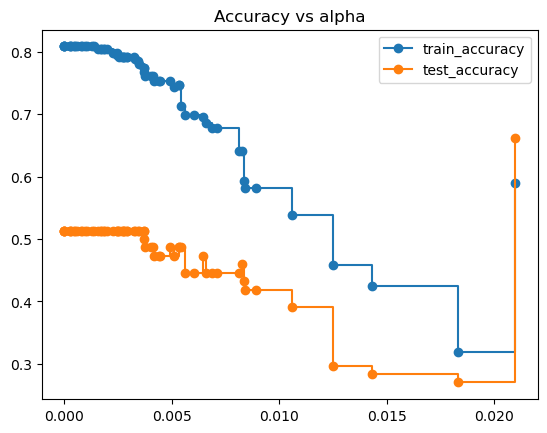

maxrain6 maxtemp7


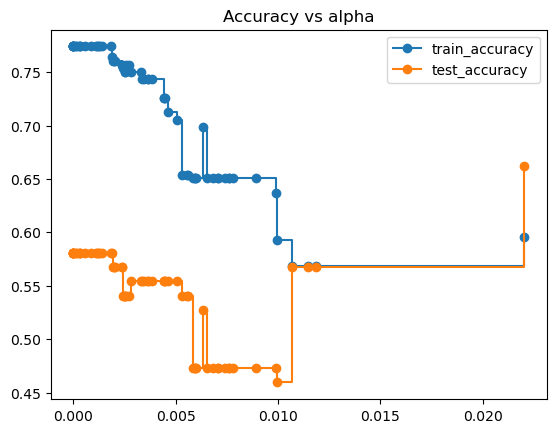

maxrain7 maxtemp2


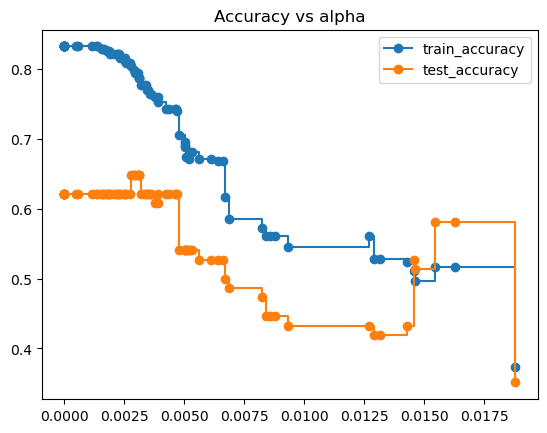

maxrain7 maxtemp3


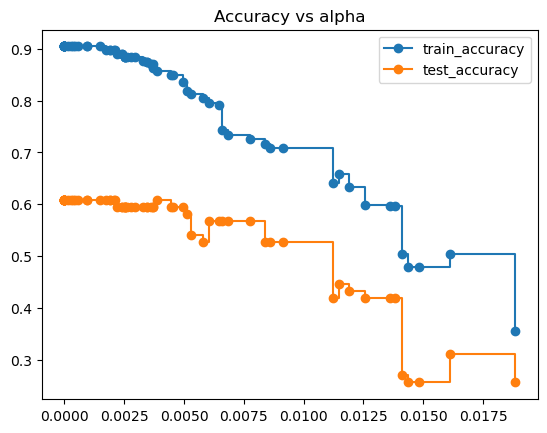

maxrain7 maxtemp4


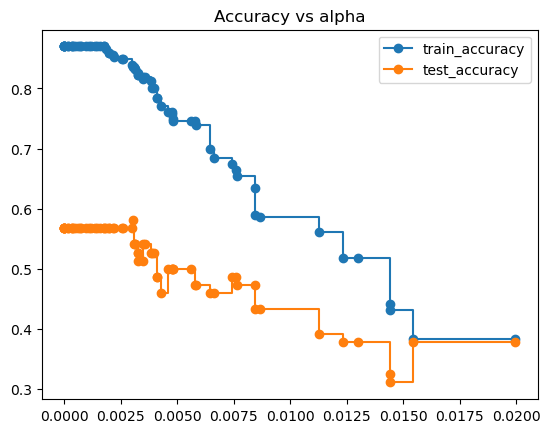

maxrain7 maxtemp5


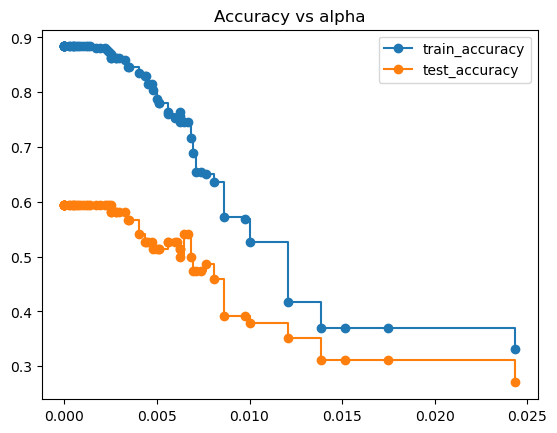

maxrain7 maxtemp6


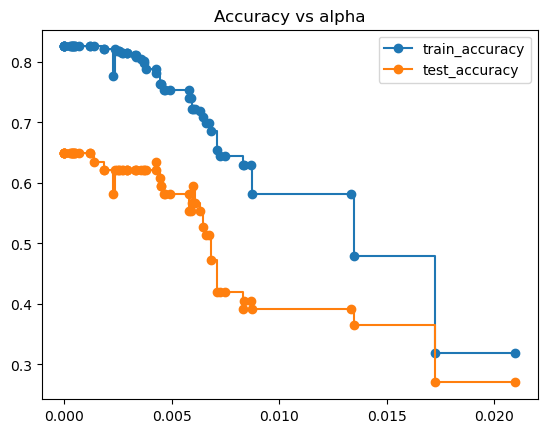

maxrain7 maxtemp7


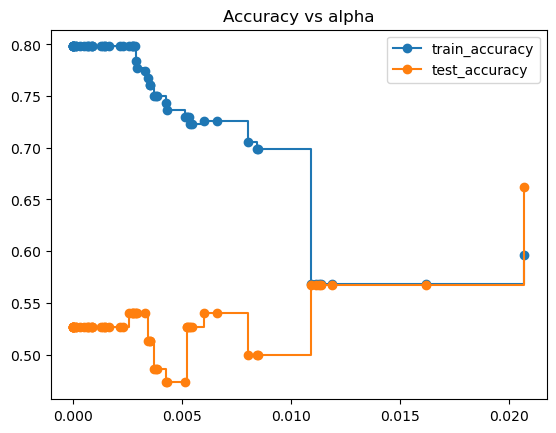

In [31]:
## Decision tree pruning with hyperparameter tuning and learning rate tuning together


for i in ['maxrain'+str(k) for k in range(2,8)]:
    for j in ['maxtemp'+str(k) for k in range(2,8)]:
        X = df.copy(deep=True)[['cat',i,j]]
        y = X['cat']
        del X['cat']
        
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
        
        dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')
        path = dt.cost_complexity_pruning_path(X_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities
        ccp_alphas = ccp_alphas[np.where(ccp_alphas>0)]
        dts = []
        for ccp_alpha in ccp_alphas:
            dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
            param_grid=dict(max_depth=range(3,10))
            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
            grid = GridSearchCV(estimator= dt, param_grid=param_grid, n_jobs=-1, cv=cv)
            grid.fit(X_train, y_train)
            grid_result = grid.best_estimator_.fit(X_train, y_train)
            dts.append(grid_result)
        clfs = dts[:-1]
        ccp_alphas = ccp_alphas[:-1]
        node_counts = [clf.tree_.node_count for clf in clfs]
        depth = [clf.tree_.max_depth for clf in clfs]
#         plt.scatter(ccp_alphas,node_counts)
#         plt.scatter(ccp_alphas,depth)
#         plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
#         plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
#         plt.legend()
#         plt.show()
        train_acc = []
        test_acc = []
        for c in clfs:
            y_train_pred = c.predict(X_train)
            y_test_pred = c.predict(X_test)
            train_acc.append(accuracy_score(y_train_pred,y_train))
            test_acc.append(accuracy_score(y_test_pred,y_test))
        
        print(i,j)
        plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post",marker='o')
        plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post",marker='o')
        plt.legend()
        plt.title('Accuracy vs alpha')
#         plt.scatter(depth,train_acc,label='train_accuracy',marker='*',c=ccp_alphas,cmap='plasma')
#         plt.scatter(depth,test_acc,label='test_accuracy',marker='o',c=ccp_alphas,cmap='plasma')
#         for k in range(len(ccp_alphas)):
#             plt.annotate(ccp_alphas[k], (depth[k], test_acc[k]))
#         plt.legend()
#         plt.title('Accuracy vs depth')
#         plt.colorbar()
        plt.show()
#         y_test_pred = model.predict(X_test)


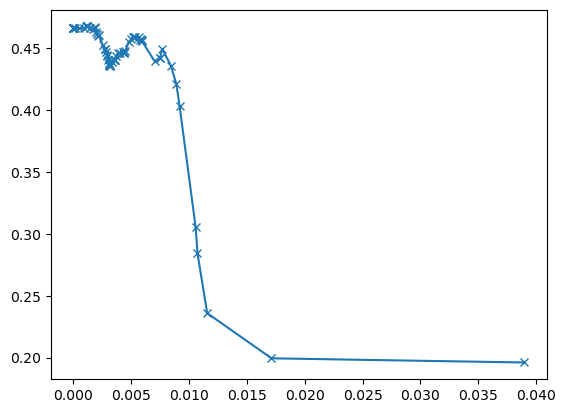

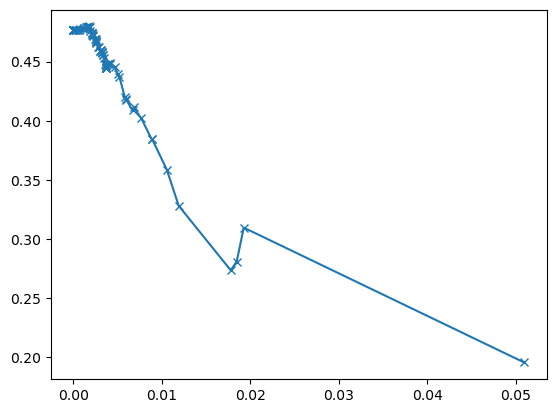

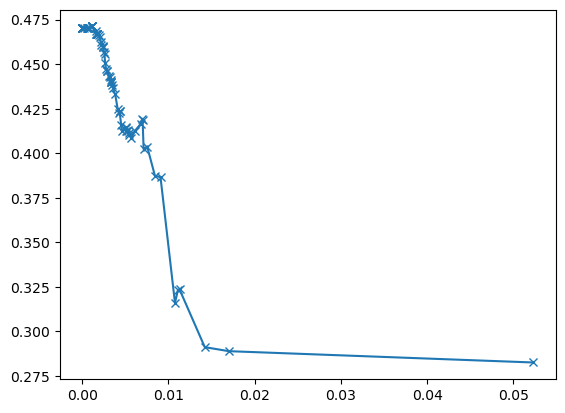

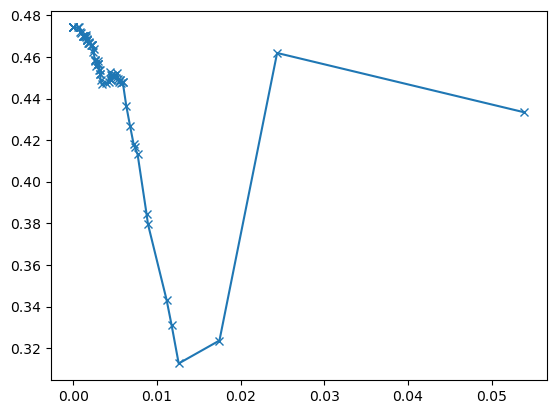

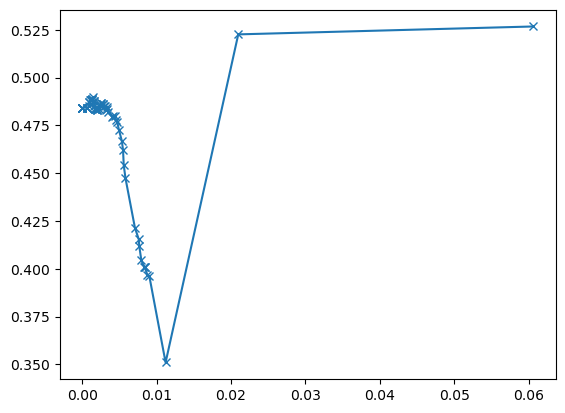

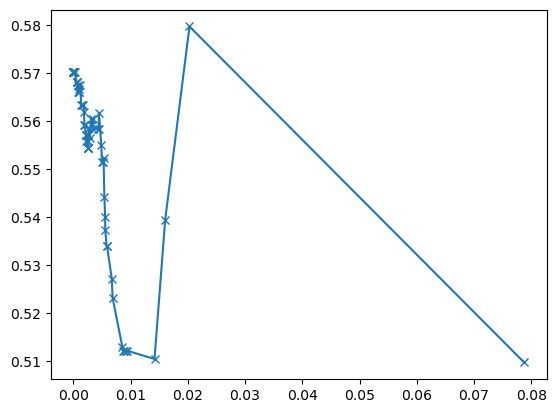

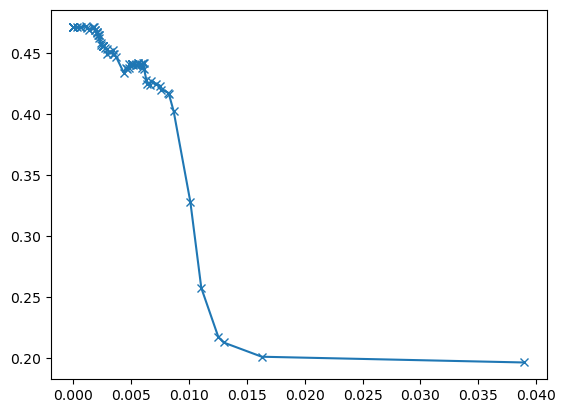

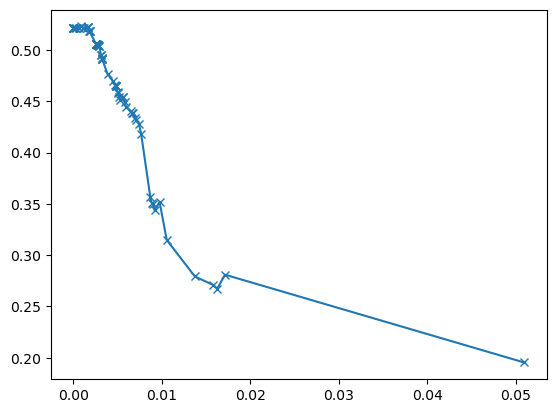

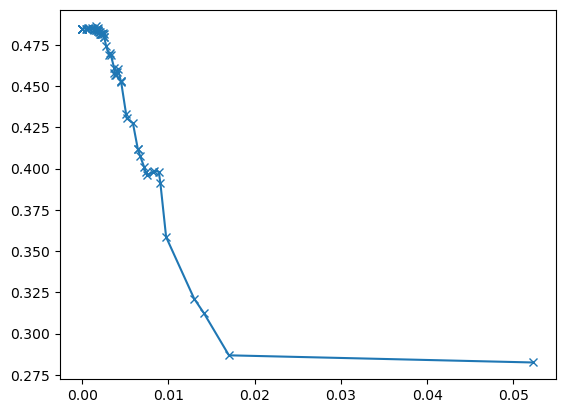

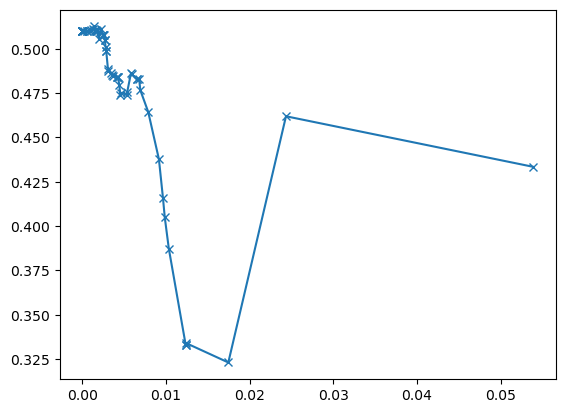

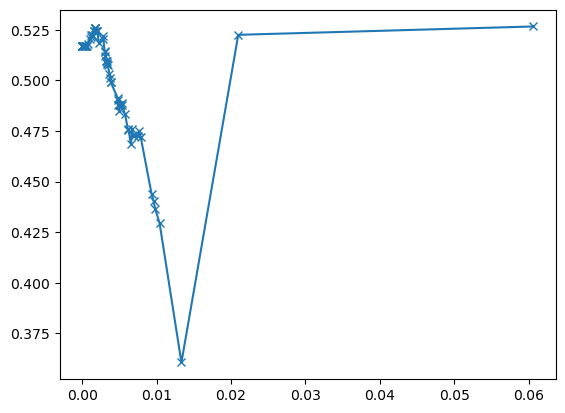

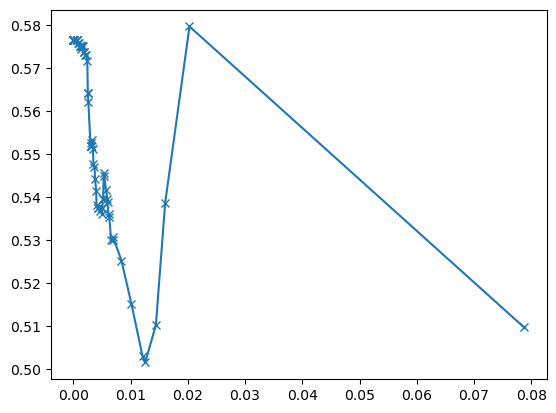

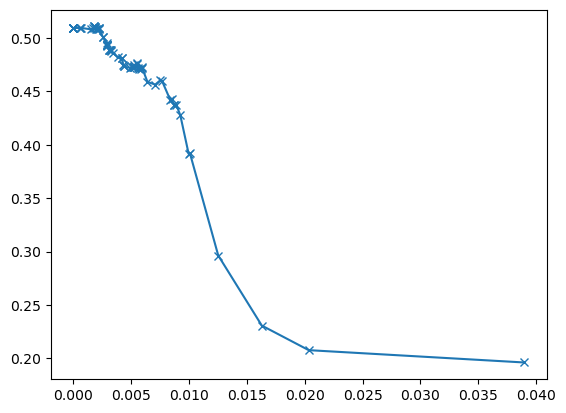

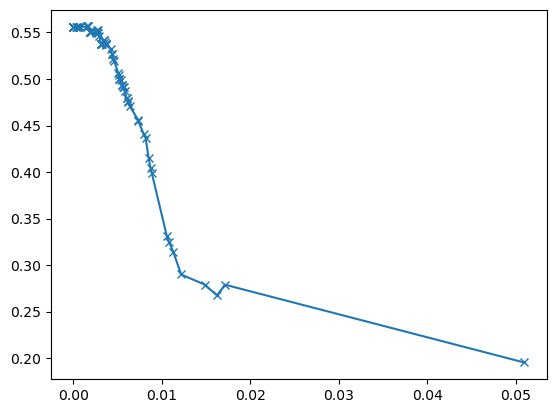

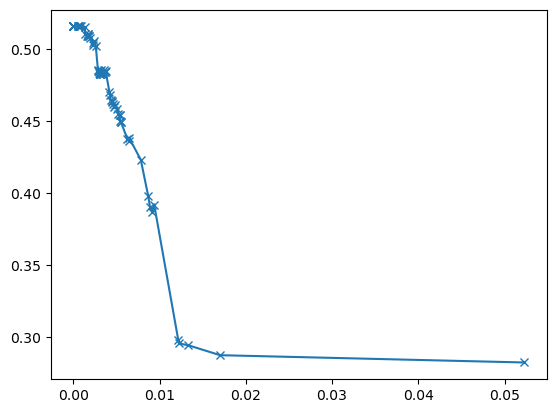

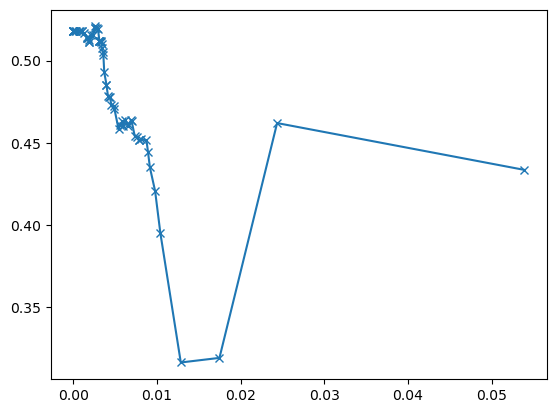

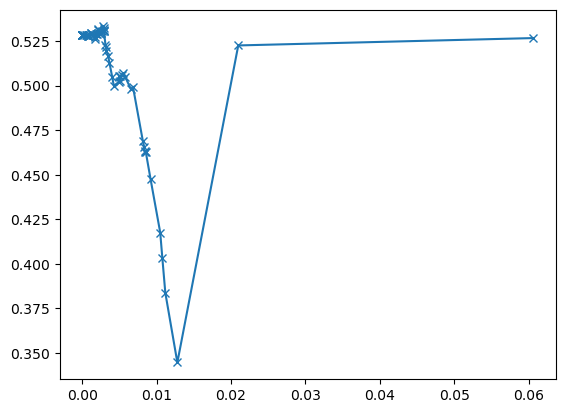

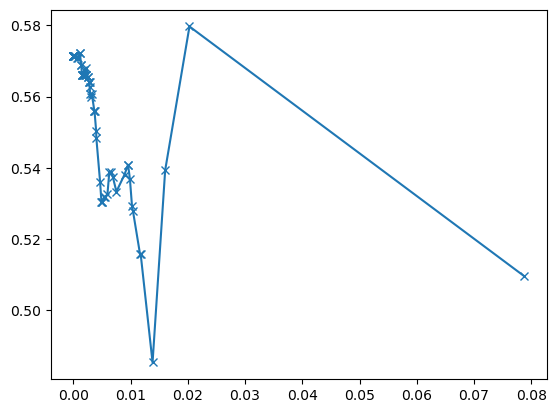

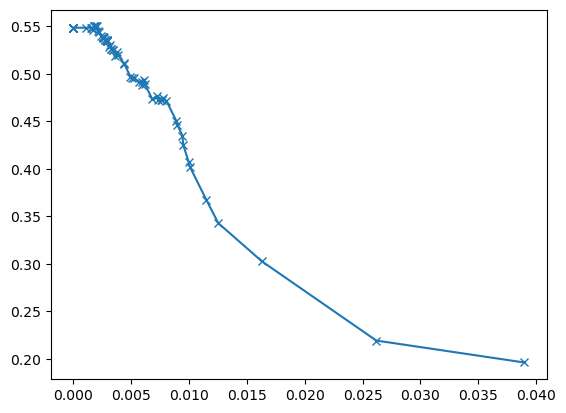

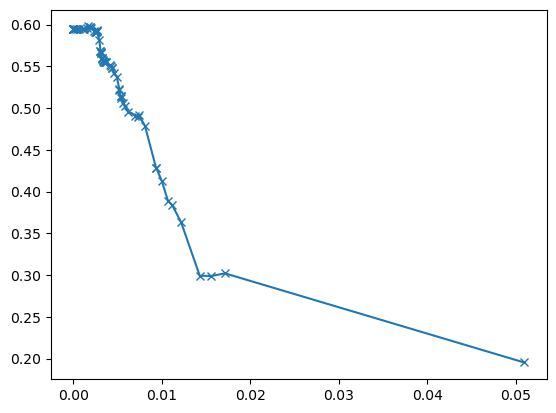

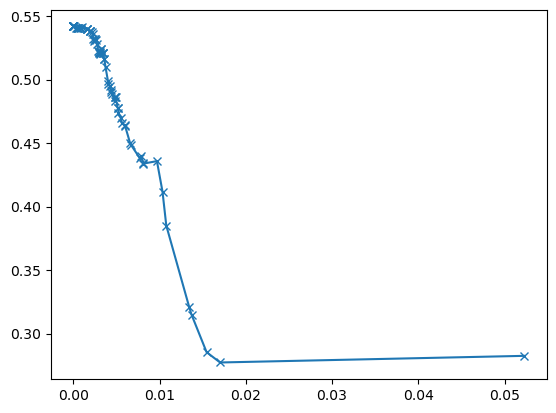

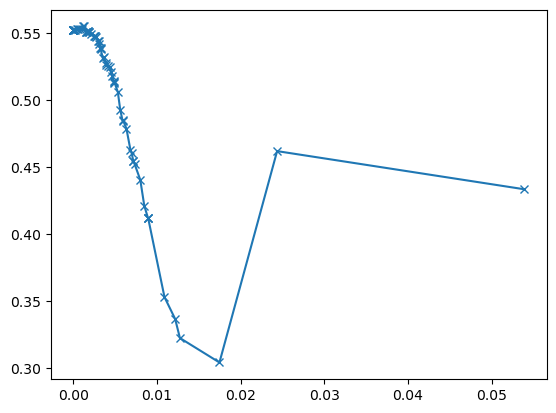

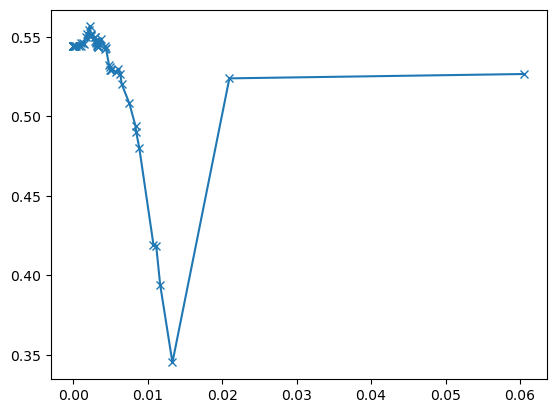

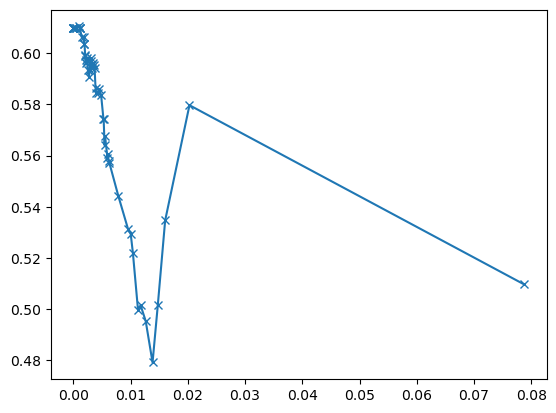

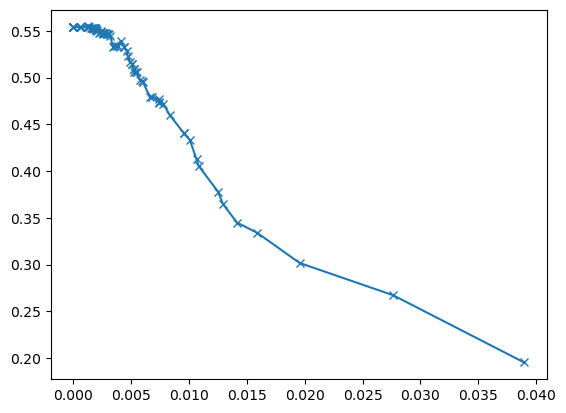

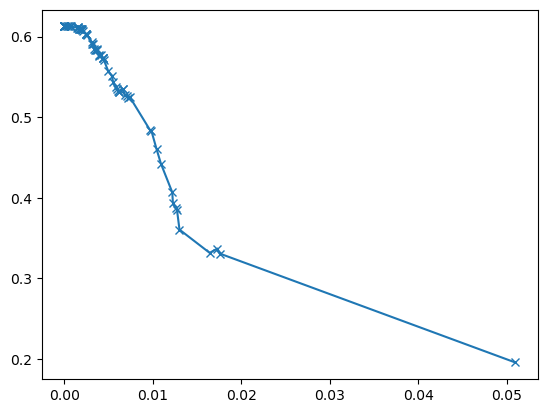

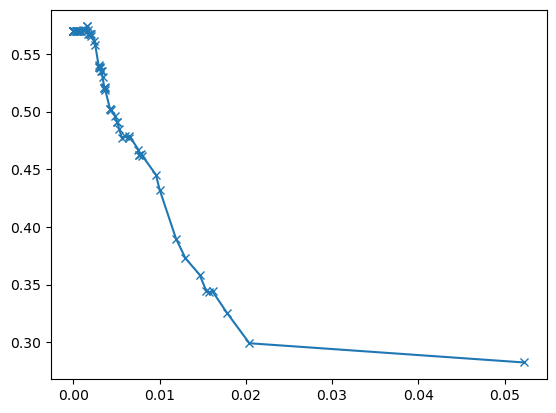

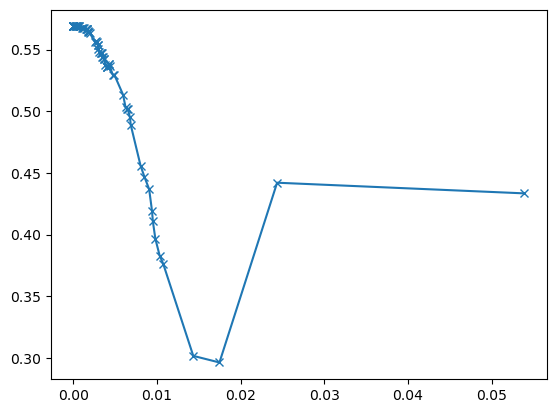

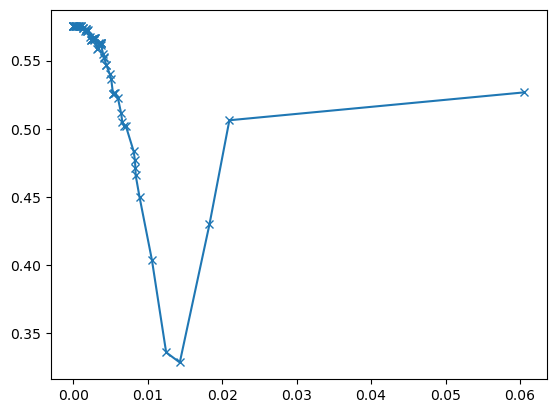

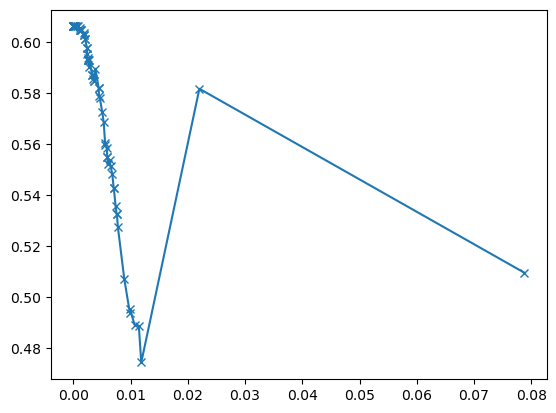

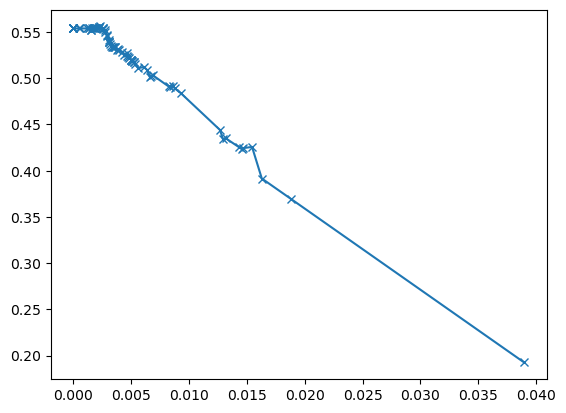

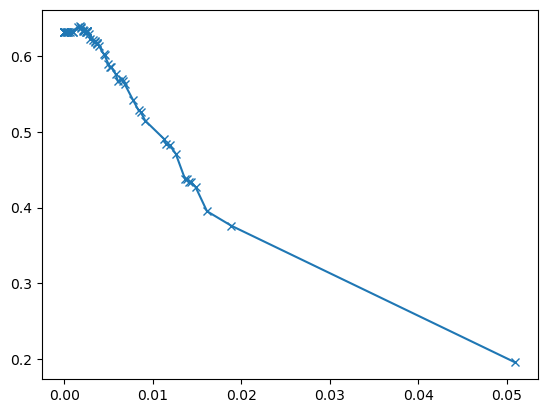

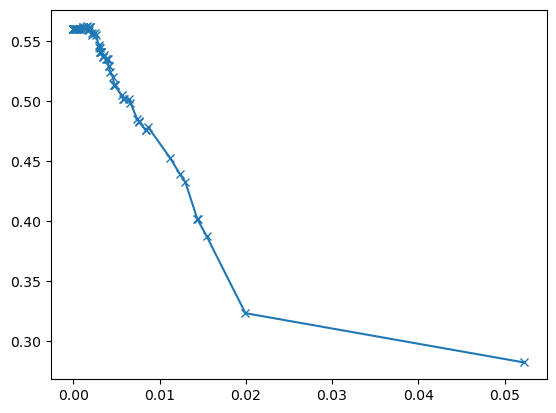

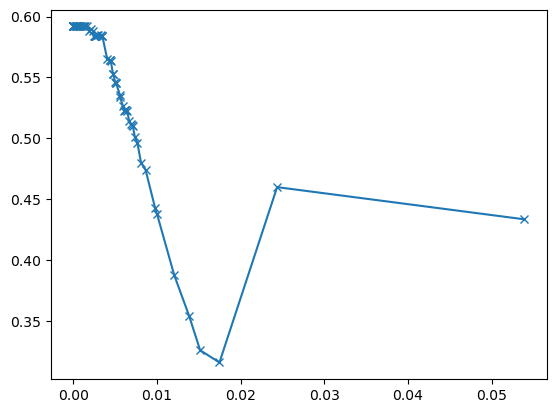

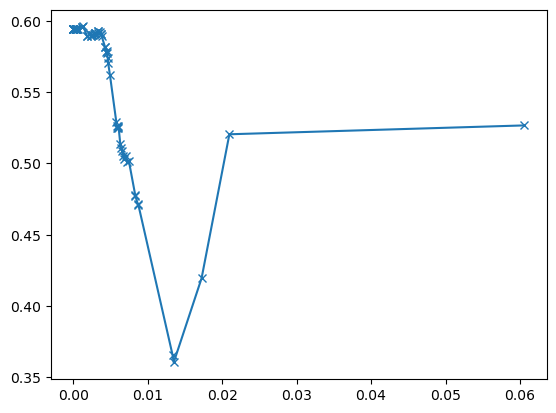

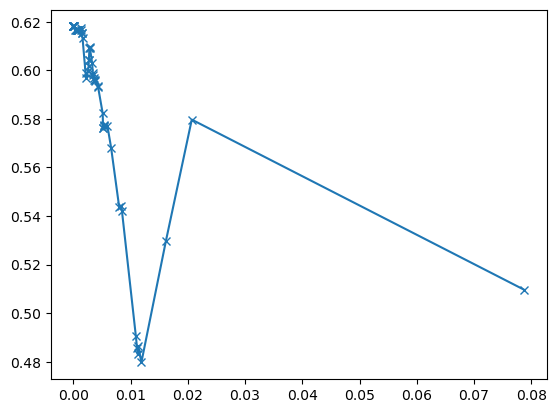

In [40]:
### Decision tree pruning and cross validation together


for i in ['maxrain'+str(k) for k in range(2,8)]:
    for j in ['maxtemp'+str(k) for k in range(2,8)]:
        X = df.copy(deep=True)[['cat',i,j]]
        y = X['cat']
        del X['cat']
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
        path = dt.cost_complexity_pruning_path(X_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities
        ccp_alphas = ccp_alphas[np.where(ccp_alphas>0)]
        dts = []
        for ccp_alpha in ccp_alphas:
            dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, class_weight='balanced')
            param_grid=dict(max_depth=range(3,10))
            cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
            grid = GridSearchCV(estimator= dt, param_grid=param_grid, n_jobs=-1, cv=cv)
            grid.fit(X, y)
            dts.append(grid.best_score_)
        plt.plot(ccp_alphas,dts,marker='x')
        plt.show()

0.791095890410959
0.7027027027027027


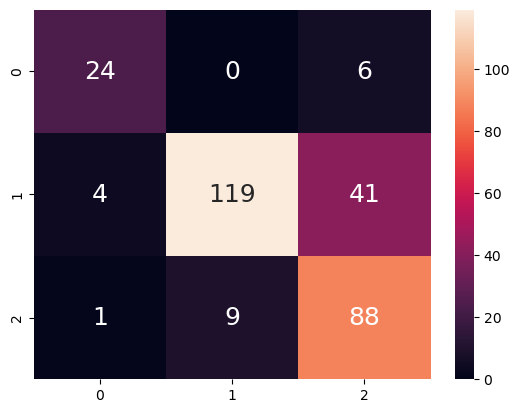

<AxesSubplot:>

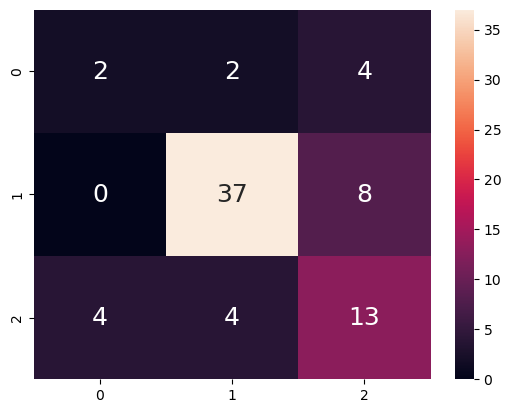

In [31]:
X = df.copy(deep=True)[['cat','maxrain5','maxtemp3']]
y = X['cat']
del X['cat']
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.002, class_weight='balanced')
param_grid=dict(max_depth=range(3,10))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=0)
grid = GridSearchCV(estimator= dt, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_res = grid.fit(X_train, y_train)
y_train_pred = grid_res.best_estimator_.predict(X_train)
y_test_pred = grid_res.best_estimator_.predict(X_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size":18})
plt.show()
sns.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt=".0f", annot_kws={"size":18})

In [33]:
print(grid_res.best_score_)
grid_res.best_estimator_

0.545287356321839


DecisionTreeClassifier(ccp_alpha=0.002, class_weight='balanced', max_depth=9,
                       random_state=0)

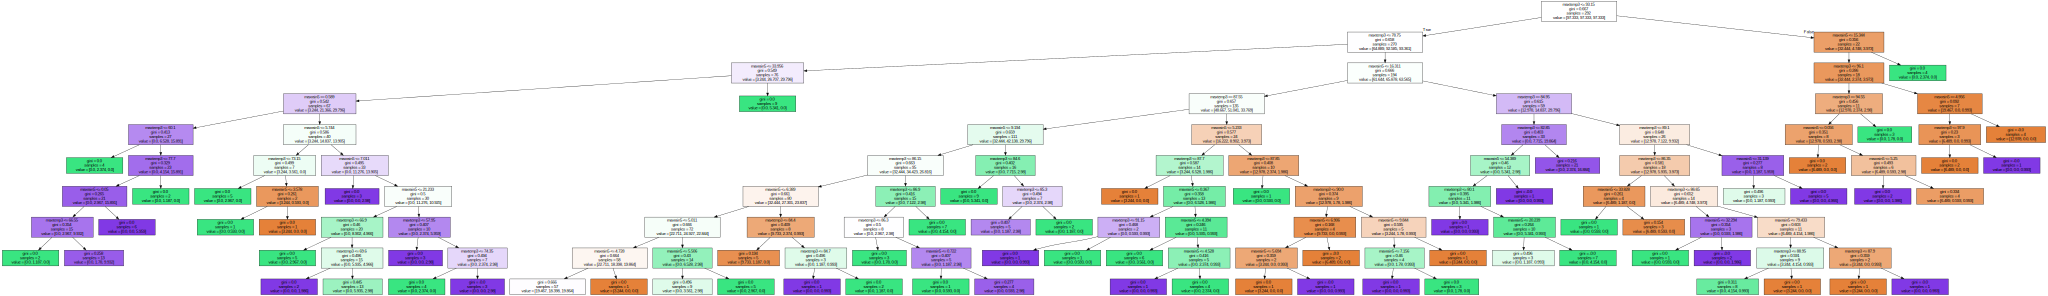

In [32]:
from graphviz import Source
 
from sklearn import tree
 
from IPython.display import SVG
from IPython.display import display 
 
import scipy.stats as sstats
graph = Source(tree.export_graphviz(grid_res.best_estimator_, out_file=None,filled=True, feature_names=X.columns),format='png')

SVG(graph.pipe(format='svg'))